In [11]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from scipy import stats


In [13]:
df = pd.read_csv('../data/MachineLearningRating_v3.txt',
    sep='|',
    encoding='utf-8',
    engine='python'
)

## Data Understanding

In [28]:
df.head()          # preview first 5 rows
df.info()          # check column types and missing values
df.describe()      # summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  category      
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  category      
 5   LegalType                 1000098 non-null  category      
 6   Title                     1000098 non-null  category      
 7   Language                  1000098 non-null  category      
 8   Bank                      854137 non-null   category      
 9   AccountType               959866 non-null   category      
 10  MaritalStatus             991839 non-null   category      
 11  Gender                    990562 non-null   catego

UnderwrittenCoverID      PolicyID  cubiccapacity      kilowatts  \
count         1.000098e+06  1.000098e+06  999546.000000  999546.000000   
mean          1.048175e+05  7.956682e+03    2466.743258      97.207919   
min           1.000000e+00  1.400000e+01       0.000000       0.000000   
25%           5.514300e+04  4.500000e+03    2237.000000      75.000000   
50%           9.408300e+04  7.071000e+03    2694.000000     111.000000   
75%           1.391900e+05  1.107700e+04    2694.000000     111.000000   
max           3.011750e+05  2.324600e+04   12880.000000     309.000000   
std           6.329371e+04  5.290039e+03     442.800640      19.393256   

      VehicleIntroDate  CustomValueEstimate  NumberOfVehiclesInFleet  \
count                0         2.204560e+05                      0.0   
mean               NaT         2.255311e+05                      NaN   
min                NaT         2.000000e+04                      NaN   
25%                NaT         1.350000e+05                      NaN   
50%                NaT         2.200000e+05                      NaN   
75%                NaT         2.800000e+05                      NaN   
max                NaT         2.655000e+07                      NaN   
std                NaN         5.645157e+05                      NaN   

         SumInsured  CalculatedPremiumPerTerm  TotalPremium   TotalClaims  
count  1.000098e+06              1.000098e+06  1.000098e+06  1.000098e+06  
mean   6.041727e+05              1.178757e+02  6.190550e+01  6.486119e+01  
min    1.000000e-02              0.000000e+00 -7.825768e+02 -1.200241e+04  
25%    5.000000e+03              3.224800e+00  0.000000e+00  0.000000e+00  
50%    7.500000e+03              8.436900e+00  2.178333e+00  0.000000e+00  
75%    2.500000e+05              9.000000e+01  2.192982e+01  0.000000e+00  
max    1.263620e+07              7.442217e+04  6.528260e+04  3.930921e+05  
std    1.508332e+06              3.997017e+02  2.302845e+02  2.384075e+03

Based on this data snippet, here's what we can understand:

##### 🔍 **Key Observations from Insurance Data:**

##### **Data Structure:**
- **52 columns** including policy IDs, vehicle details, coverage info, and financial metrics
- **Mixed data types**: numeric, categorical, and possibly missing values (NaN)

##### **Vehicle & Policy Details:**
- **Vehicle specifications**: Registration year, cylinders, cubic capacity, kilowatts, doors
- **Coverage details**: Sum insured, premiums, claims data
- **Policy identifiers**: UnderwrittenCoverID, PolicyID, PostalCode

##### **Financial Metrics:**
- **Premium calculations**: CalculatedPremiumPerTerm, TotalPremium
- **Risk assessment**: Multiple premium/claim amount columns
- **Fleet data**: NumberOfVehiclesinFleet indicates commercial policies

##### **Data Quality Issues:**
- **Missing values**: NaN present in multiple columns
- **Formatting problems**: Scientific notation mixed with regular numbers
- **Inconsistent data**: Some columns showing extreme values or placeholders

##### **Potential Analysis Areas:**
1. **Risk modeling** using vehicle specs vs claim amounts
2. **Pricing optimization** based on calculated vs actual premiums
3. **Fraud detection** from claim patterns
4. **Customer segmentation** by postal code/vehicle type

**Next steps**: Clean the data, handle missing values, convert formats, then explore relationships between vehicle characteristics and insurance claims.

### Check Missing Values


In [16]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_table = pd.concat([missing, missing_percent], axis=1, keys=['Missing Values', '% of Total'])
print(missing_table)


                          Missing Values  % of Total
NumberOfVehiclesInFleet          1000098  100.000000
CrossBorder                       999400   99.930207
CustomValueEstimate               779642   77.956560
Rebuilt                           641901   64.183810
Converted                         641901   64.183810
WrittenOff                        641901   64.183810
NewVehicle                        153295   15.327998
Bank                              145961   14.594670
AccountType                        40232    4.022806
Gender                              9536    0.953507
MaritalStatus                       8259    0.825819
VehicleType                          552    0.055195
make                                 552    0.055195
mmcode                               552    0.055195
Model                                552    0.055195
Cylinders                            552    0.055195
bodytype                             552    0.055195
kilowatts                            552    0.

###### 🔍 **Missing Value Analysis**

###### **Critical Issues:**
- **100% missing**: `NumberOfVehiclesInFleet` → Column is **useless**
- **99.9% missing**: `CrossBorder` → Nearly useless
- **64-78% missing**: Key vehicle history fields (`Rebuilt`, `Converted`, `WrittenOff`, `CustomValueEstimate`)

###### **Data Quality:**
- **Perfect columns**: 30+ columns have **0% missing** (policy, premium, claim data)
- **Vehicle specs problematic**: 0.06% missing in make/model/engine details
- **Demographics issues**: Gender/MaritalStatus ~1% missing

###### **Action Required:**
1. **Drop**: 100% missing columns
2. **Impute/Careful handling**: High-missing columns (>60%)
3. **Minimal impact**: Low-missing columns (<1%)

**Bottom line**: Core insurance data (premiums, claims, policy info) is **complete**, but vehicle/demographic data needs cleaning.

### Check column types

In [17]:
# check date format 
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], format='%Y-%m-%d', errors='coerce')


In [22]:
# 1. Convert VehicleIntroDate to datetime
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce', dayfirst=True)

# 2. Convert Yes/No type columns to boolean
bool_cols = ['NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder']
for col in bool_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

# 3. Convert categorical columns to category dtype
categorical_cols = [
    'TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 
    'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 
    'MainCrestaZone','SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 
    'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
    'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 
    'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

df[categorical_cols] = df[categorical_cols].astype('category')

# 4. Convert numeric-label columns to category
numeric_labels = ['PostalCode', 'mmcode', 'Cylinders', 'NumberOfDoors', 'RegistrationYear']

for col in numeric_labels:
    df[col] = df[col].astype('category')



## Data Summarization

In [30]:
#Descriptive statistics
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].describe()


UnderwrittenCoverID      PolicyID  cubiccapacity      kilowatts  \
count         1.000098e+06  1.000098e+06  999546.000000  999546.000000   
mean          1.048175e+05  7.956682e+03    2466.743258      97.207919   
std           6.329371e+04  5.290039e+03     442.800640      19.393256   
min           1.000000e+00  1.400000e+01       0.000000       0.000000   
25%           5.514300e+04  4.500000e+03    2237.000000      75.000000   
50%           9.408300e+04  7.071000e+03    2694.000000     111.000000   
75%           1.391900e+05  1.107700e+04    2694.000000     111.000000   
max           3.011750e+05  2.324600e+04   12880.000000     309.000000   

       CustomValueEstimate  NumberOfVehiclesInFleet    SumInsured  \
count         2.204560e+05                      0.0  1.000098e+06   
mean          2.255311e+05                      NaN  6.041727e+05   
std           5.645157e+05                      NaN  1.508332e+06   
min           2.000000e+04                      NaN  1.000000e-02   
25%           1.350000e+05                      NaN  5.000000e+03   
50%           2.200000e+05                      NaN  7.500000e+03   
75%           2.800000e+05                      NaN  2.500000e+05   
max           2.655000e+07                      NaN  1.263620e+07   

       CalculatedPremiumPerTerm  TotalPremium   TotalClaims  
count              1.000098e+06  1.000098e+06  1.000098e+06  
mean               1.178757e+02  6.190550e+01  6.486119e+01  
std                3.997017e+02  2.302845e+02  2.384075e+03  
min                0.000000e+00 -7.825768e+02 -1.200241e+04  
25%                3.224800e+00  0.000000e+00  0.000000e+00  
50%                8.436900e+00  2.178333e+00  0.000000e+00  
75%                9.000000e+01  2.192982e+01  0.000000e+00  
max                7.442217e+04  6.528260e+04  3.930921e+05

In [35]:
#Count unique values for categorical variables

# categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# print("Number of categorical columns:", len(categorical_cols))

# for col in categorical_cols[:10]:
#     print(col, "=>", df[col].nunique())


unique_counts = []

for col in categorical_cols:
    unique_counts.append((col, df[col].nunique()))

unique_df = pd.DataFrame(unique_counts, columns=["Column", "Unique Values"])

print(unique_df.to_string(index=False))



            Column  Unique Values
  TransactionMonth             23
       Citizenship              4
         LegalType              6
             Title              5
          Language              1
              Bank             11
       AccountType              3
     MaritalStatus              3
            Gender              3
           Country              1
          Province              9
        PostalCode            888
    MainCrestaZone             16
     SubCrestaZone             45
          ItemType              1
            mmcode            427
       VehicleType              5
  RegistrationYear             25
              make             46
             Model            411
         Cylinders              7
          bodytype             13
     NumberOfDoors              6
  AlarmImmobiliser              2
    TrackingDevice              2
CapitalOutstanding            659
        NewVehicle              0
        WrittenOff              0
           Reb

In [36]:
## Numeric Insights Summary

- **Data quality issues:** negative values in `TotalPremium` and `TotalClaims`, zeros in `cubiccapacity` and `kilowatts`.
- **Skewed distributions:** premiums and claims are heavily right-skewed. Most claims = 0 (median `TotalClaims` = 0).
- **High-impact variables for modeling:** `SumInsured`, `cubiccapacity`, `kilowatts`, `CalculatedPremiumPerTerm`, `TotalPremium`.
- **Next step:** clean negatives/zeros, possibly log-transform skewed financial columns, derive `LossRatio = TotalClaims / TotalPremium`.

## Categorical Insights Summary

- **Useful for risk analysis:** `Gender`, `Province`, `VehicleType`, `make`, `Model`, `Cylinders`, `bodytype`, `AlarmImmobiliser`, `TrackingDevice`, `TermFrequency`, `CoverType`.
- **Remove / ignore:** `Language`, `Country`, `ItemType`, `NewVehicle`, `WrittenOff`, `Rebuilt`, `Converted`, `CrossBorder`, `StatutoryClass`, `StatutoryRiskType`.
- **High-cardinality caution:** `PostalCode`, `make`, `Model` → consider grouping to reduce dimensionality.
- **Good candidates for hypothesis testing (Task 3):** `Gender`, `Province`, `PostalCode`, `VehicleType`.

## Key Combined Insights

- **Risk drivers:**
  - Geography: `Province`, `PostalCode`, `CrestaZone`
  - Vehicle: `VehicleType`, `make`, `Model`, `Cylinders`, `kilowatts`, `VehicleAge` (from `RegistrationYear`)
  - Policy: `CoverType`, `SumInsured`, `TermFrequency`, `ExcessSelected`
  - Customer: `Gender`, `MaritalStatus`

- **Data issues to fix:**
  - Negative premiums and claims → must clean.
  - Missing values in `CustomValueEstimate`, `cubiccapacity`, `kilowatts`.

- **Feature engineering ideas:**
  - `VehicleAge = CurrentYear - RegistrationYear`
  - `LossRatio = TotalClaims / TotalPremium`
  - Group rare `Model` or `make` for predictive modeling.

- **EDA focus:**
  - Loss ratio trends by `Province`, `VehicleType`, `Gender`.
  - Outlier detection for `TotalClaims`, `TotalPremium`, `SumInsured`.
  - Seasonal trends using `TransactionMonth`.

✅ **Summary:**

Your dataset is rich but contains data quality issues (negatives, zeros, missing values). The main risk drivers are geographic, vehicle, and policy-related features. Categorical features are mostly low- to moderate-cardinality, with a few high-cardinality features (`Model`, `PostalCode`) that need careful handling.
→' 
This forms a strong foundation for Task 1 EDA, Task 3 hypothesis testing, and Task 4 predictive modeling.
→' 

SyntaxError: invalid character '→' (U+2192) (216831162.py, line 12)

## Univariate Analysis

### Distribution of numeric variables

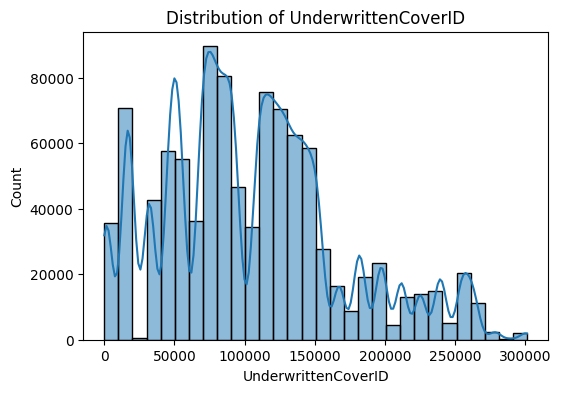

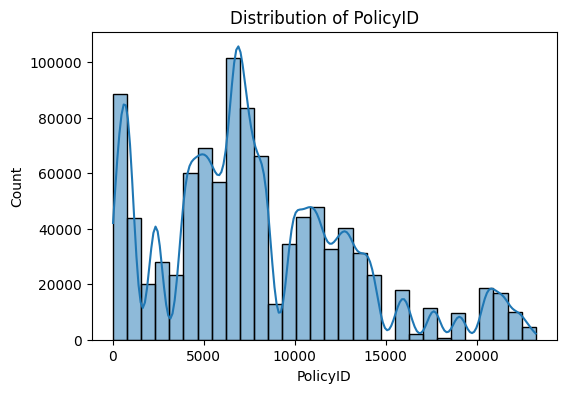

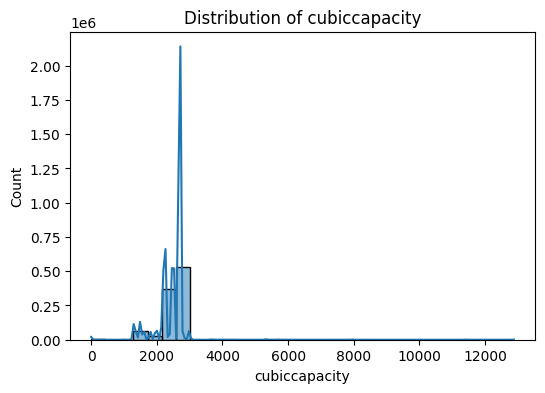

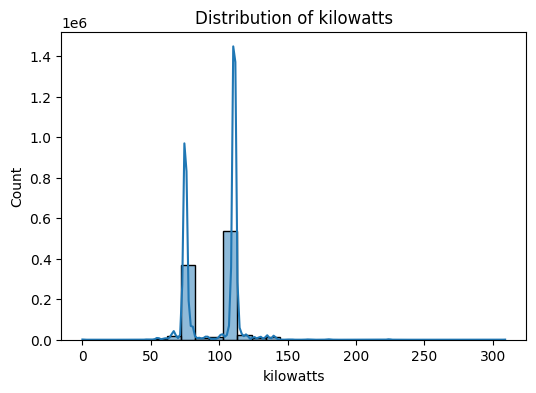

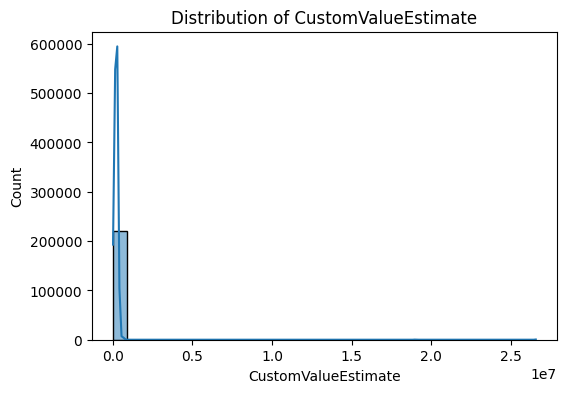

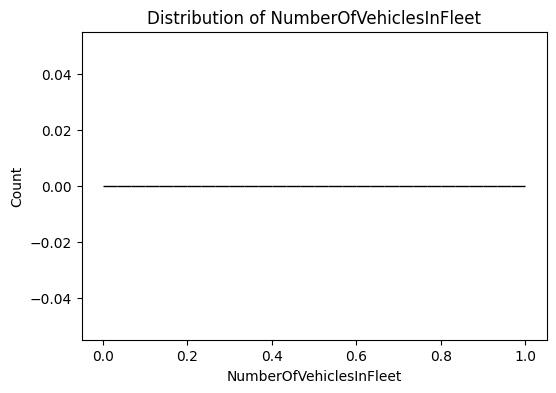

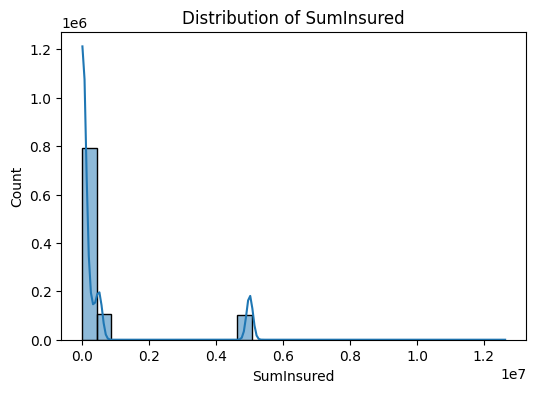

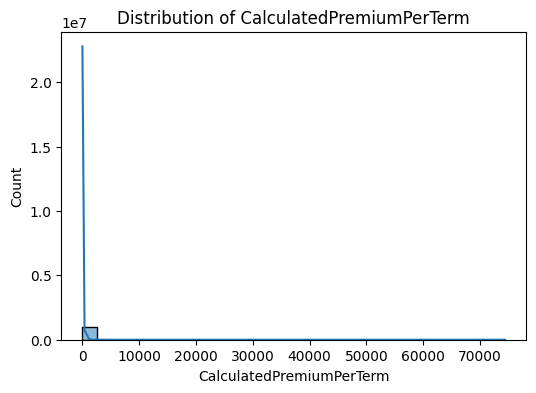

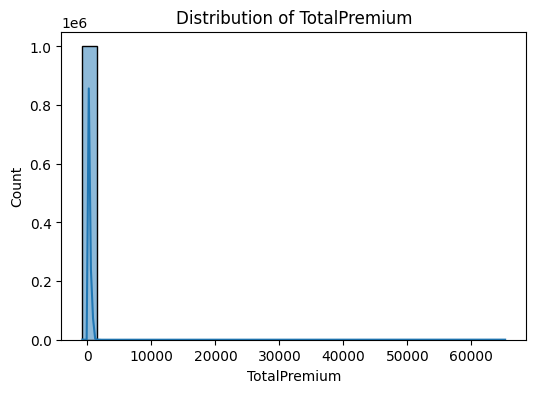

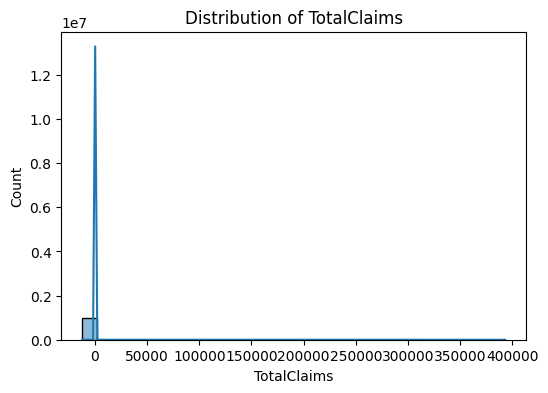

In [37]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### Distribution of categorical variables


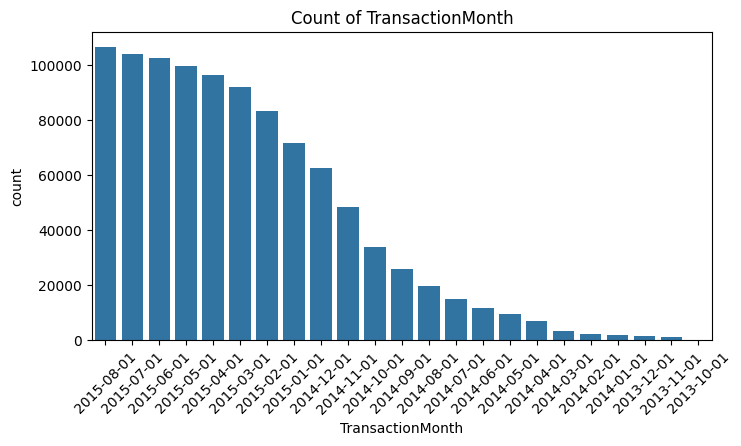

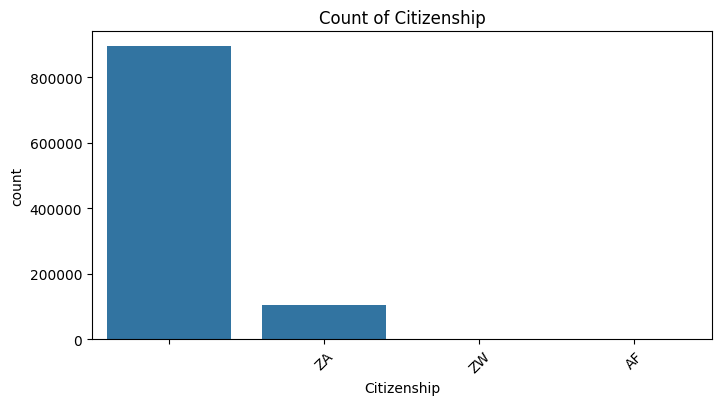

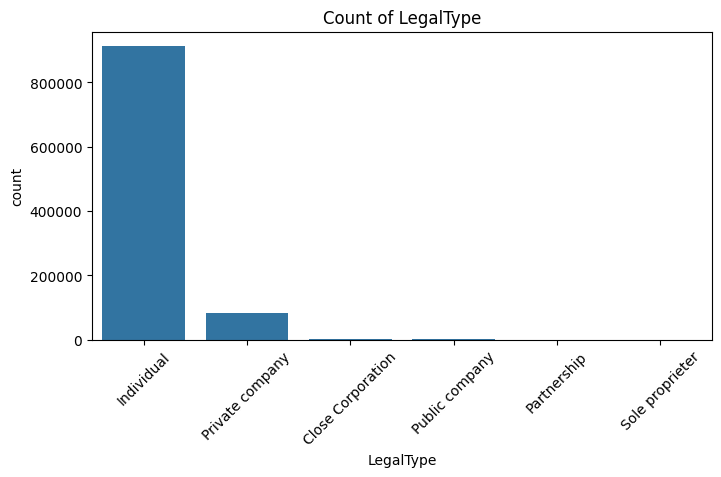

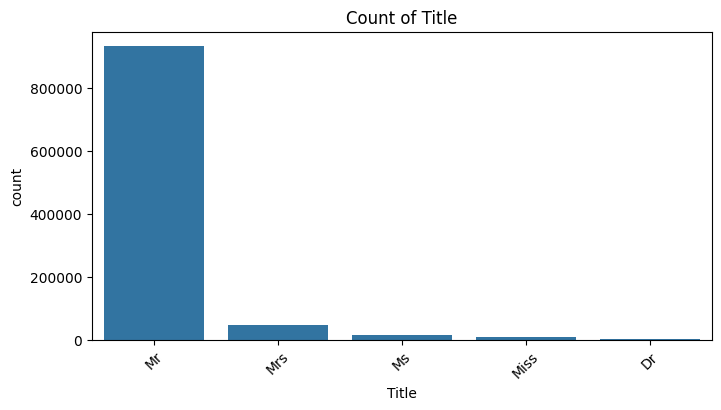

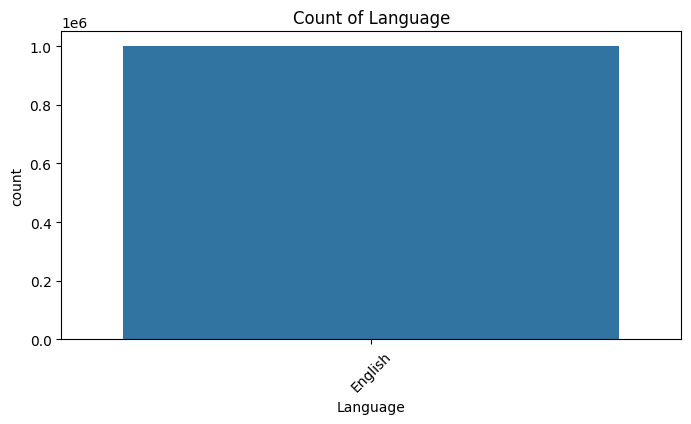

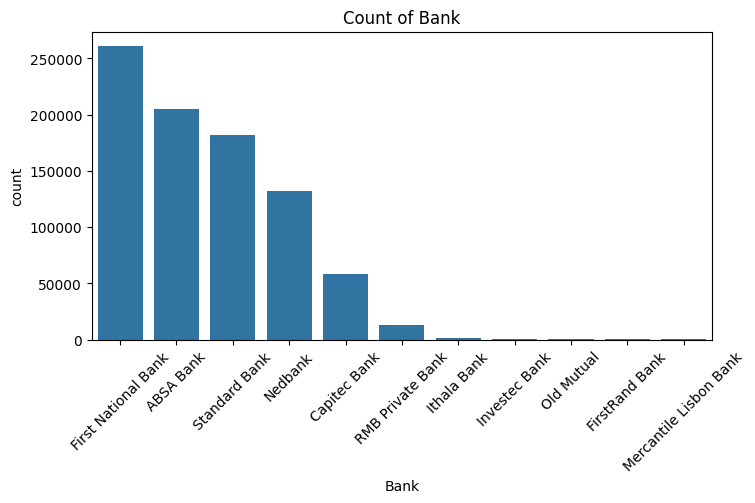

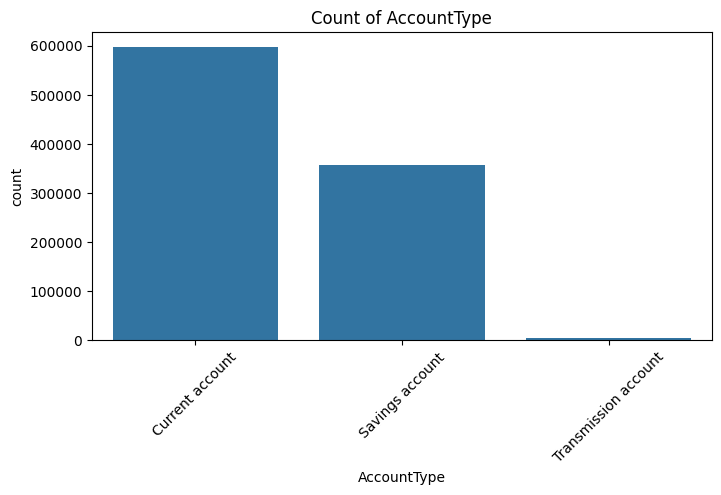

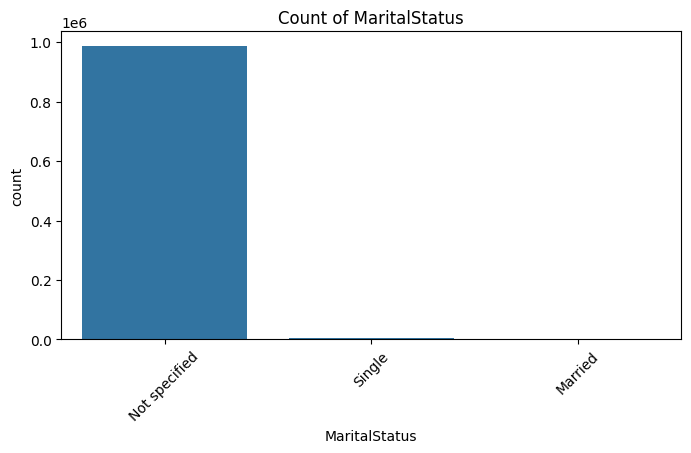

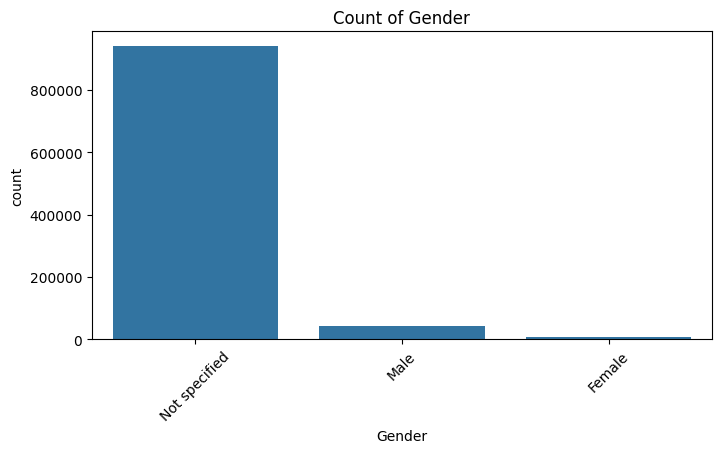

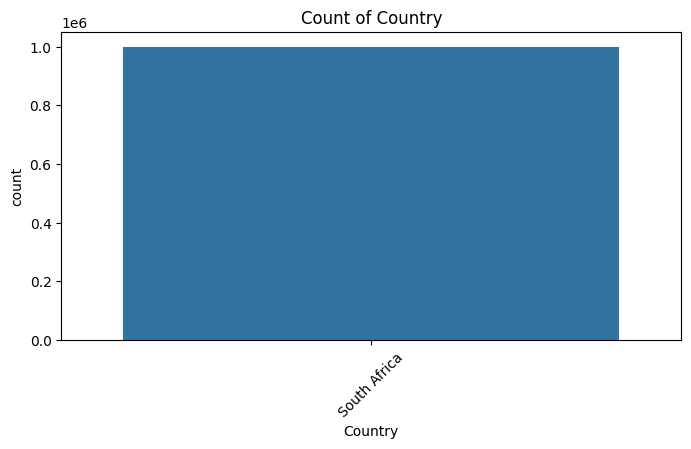

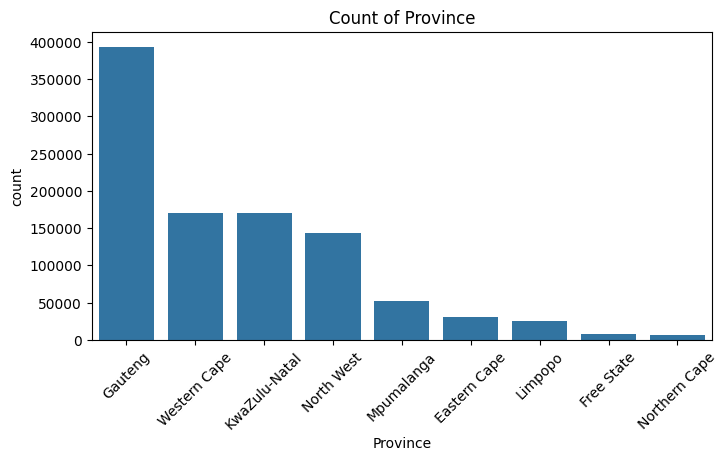

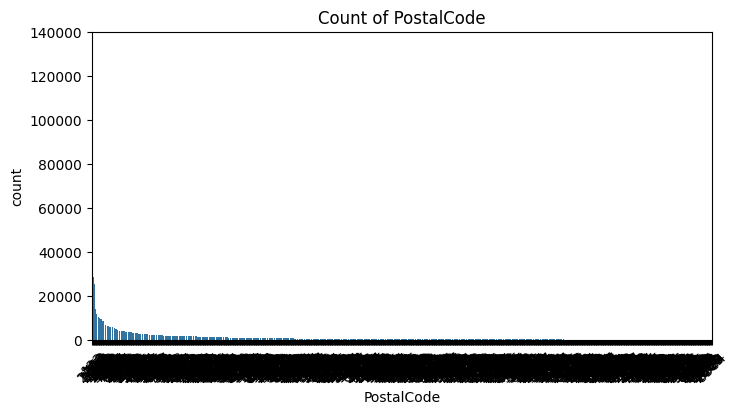

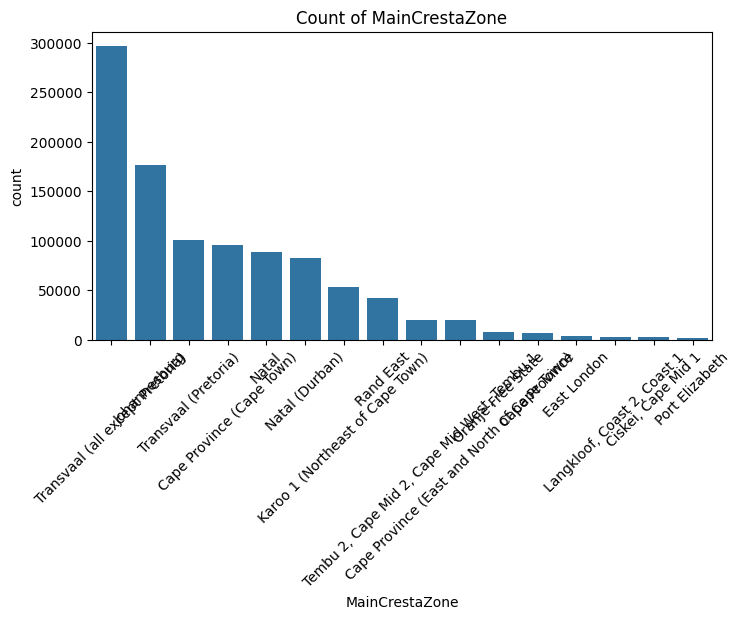

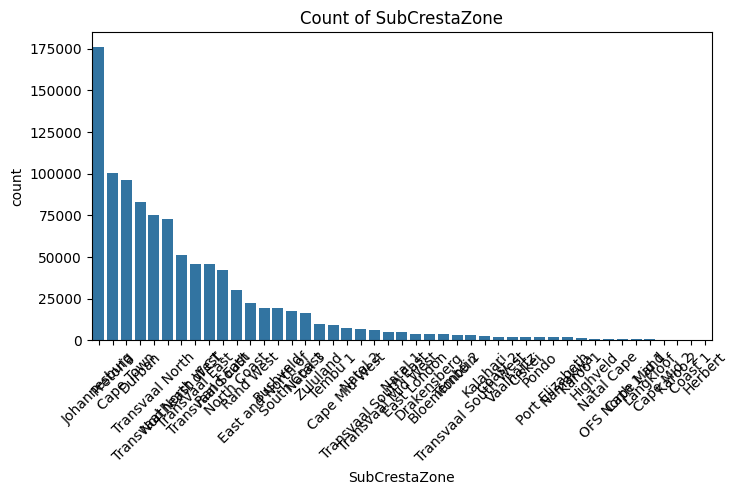

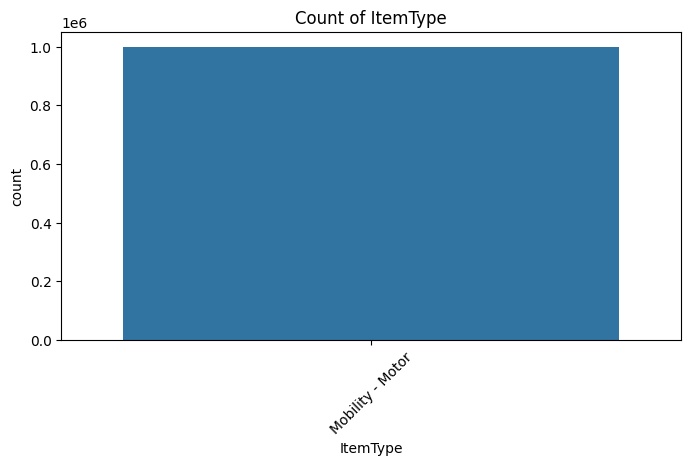

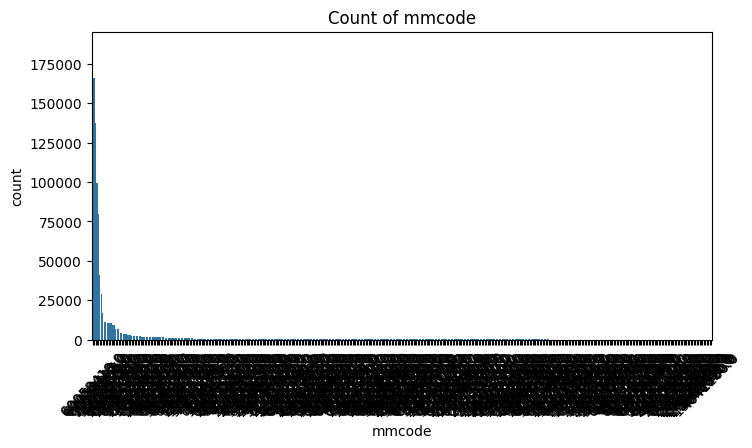

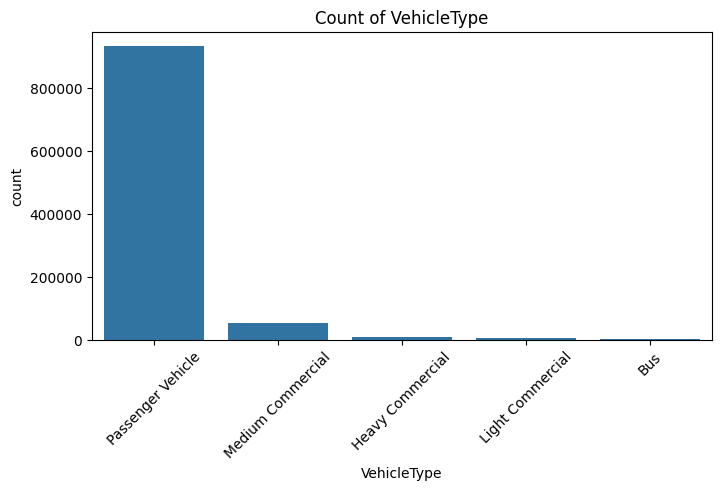

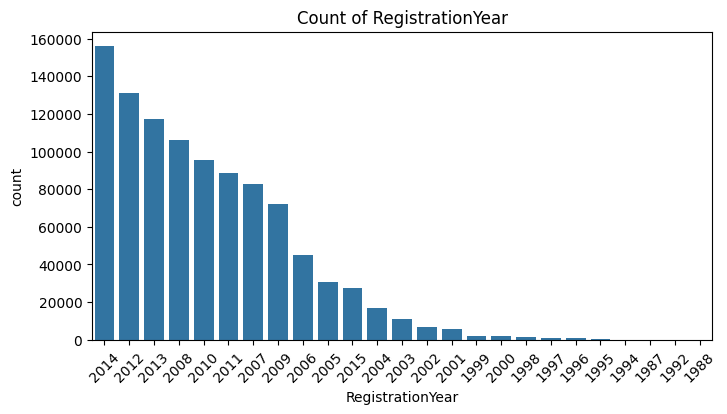

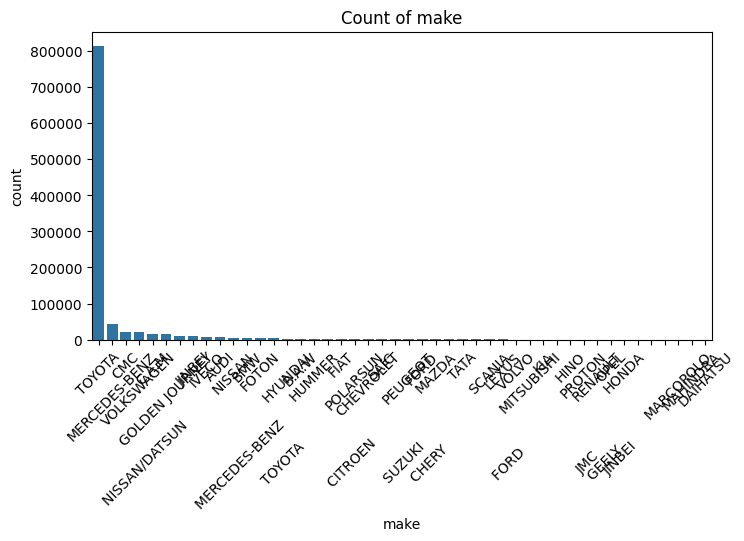

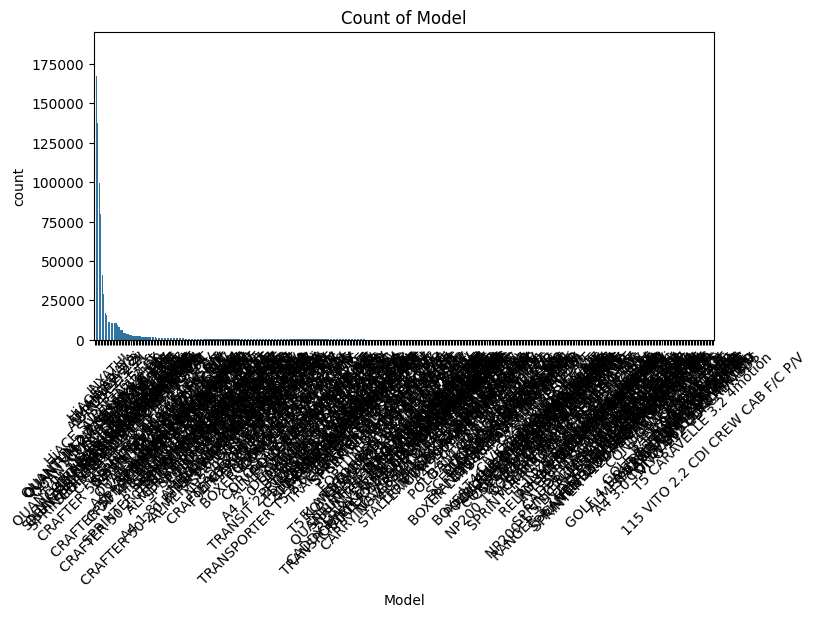

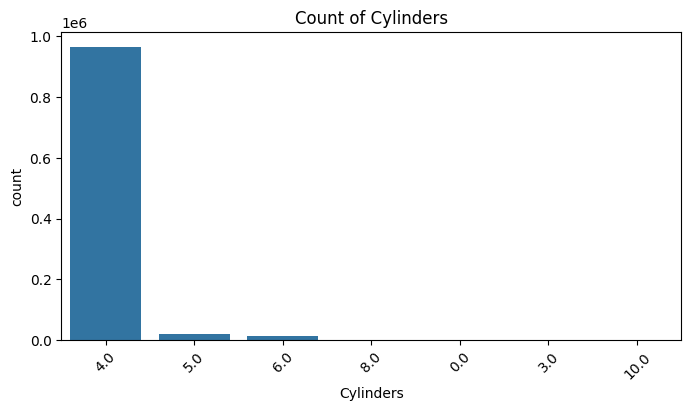

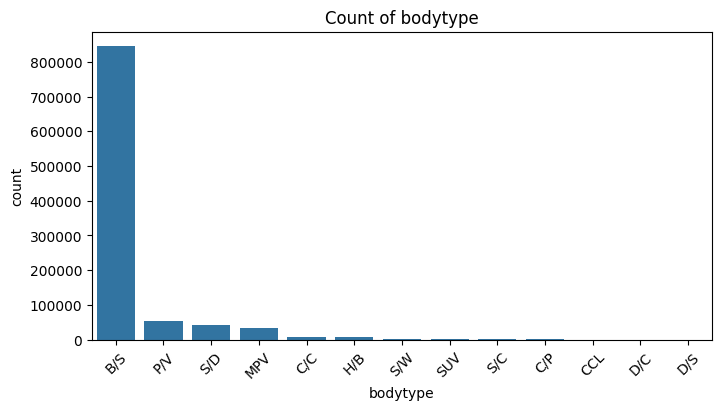

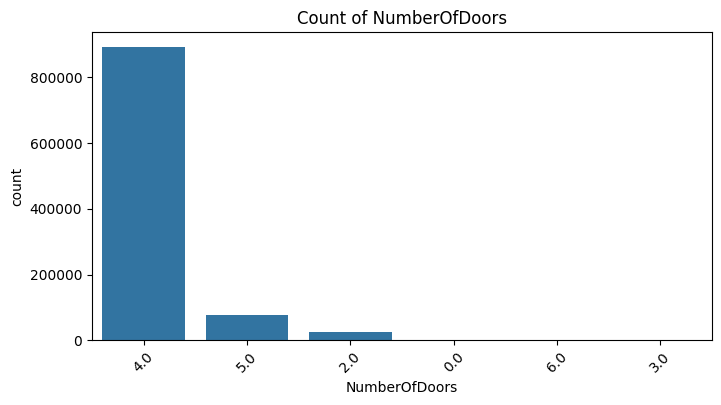

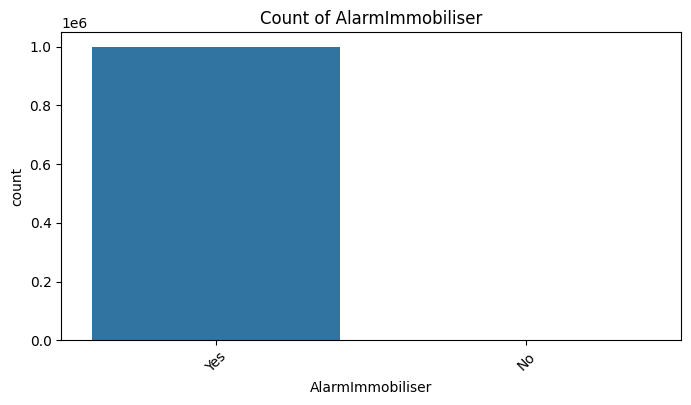

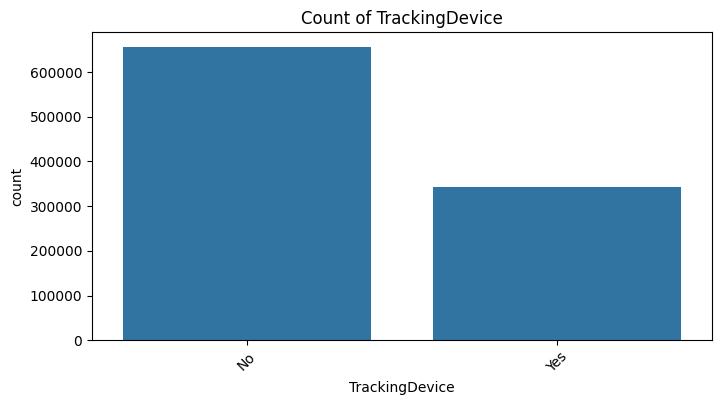

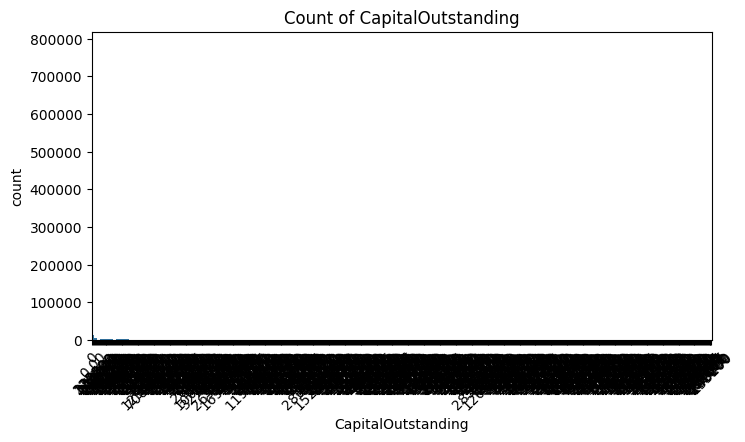

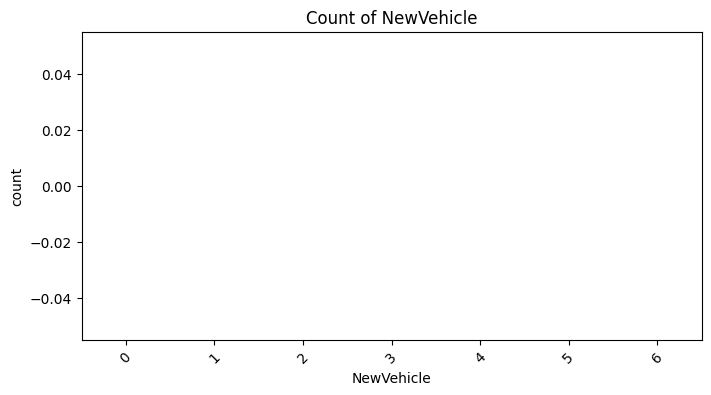

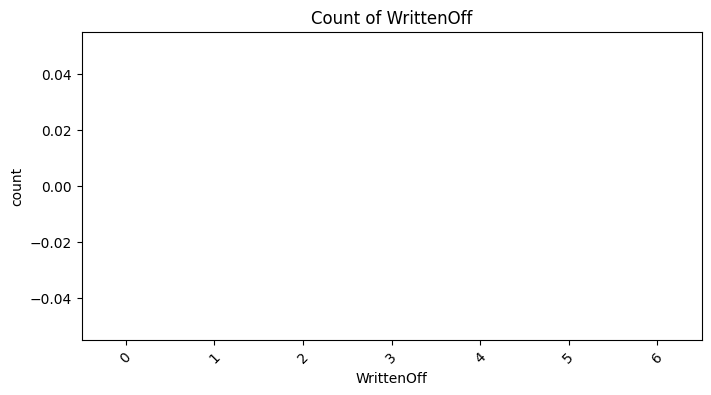

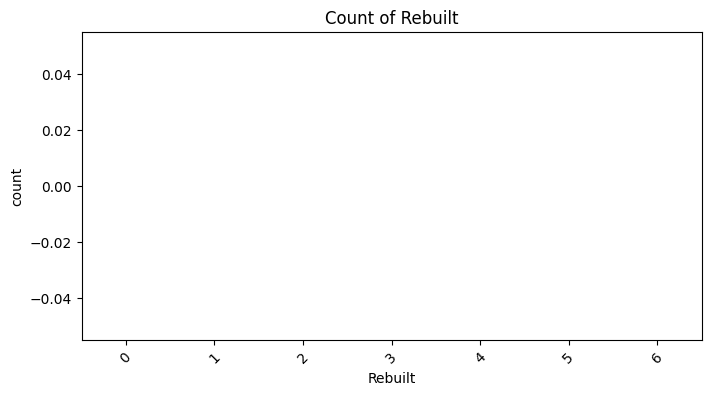

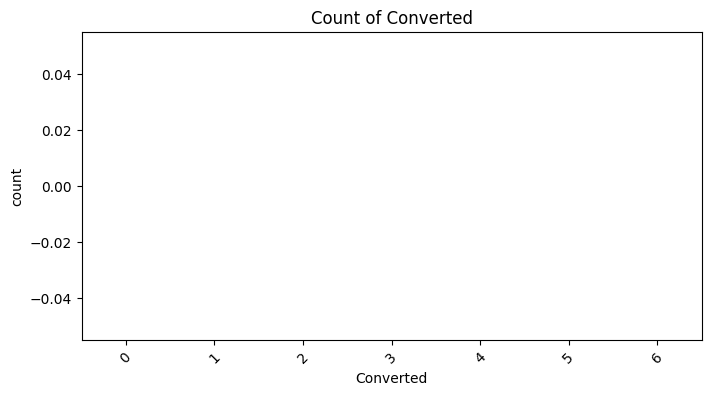

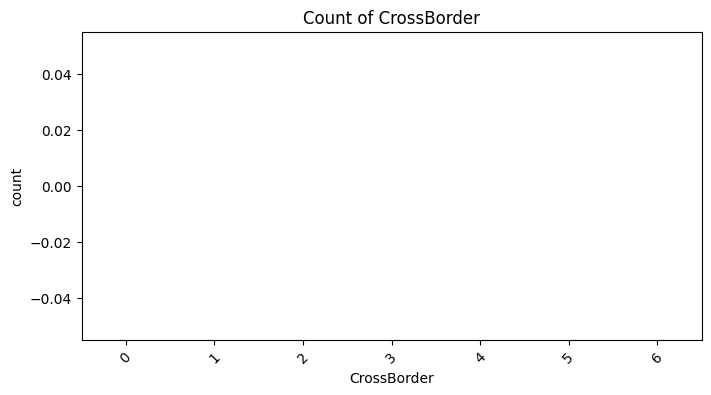

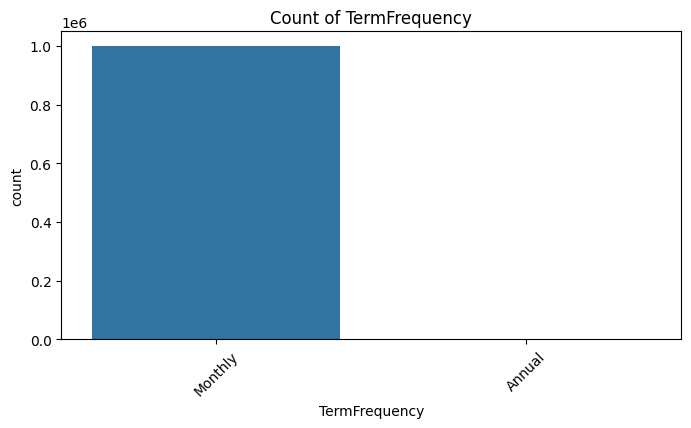

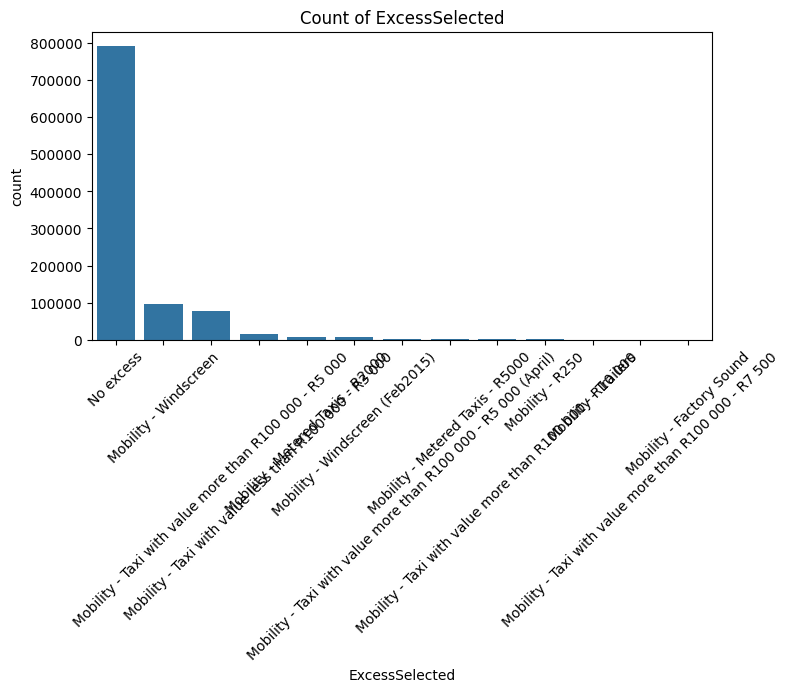

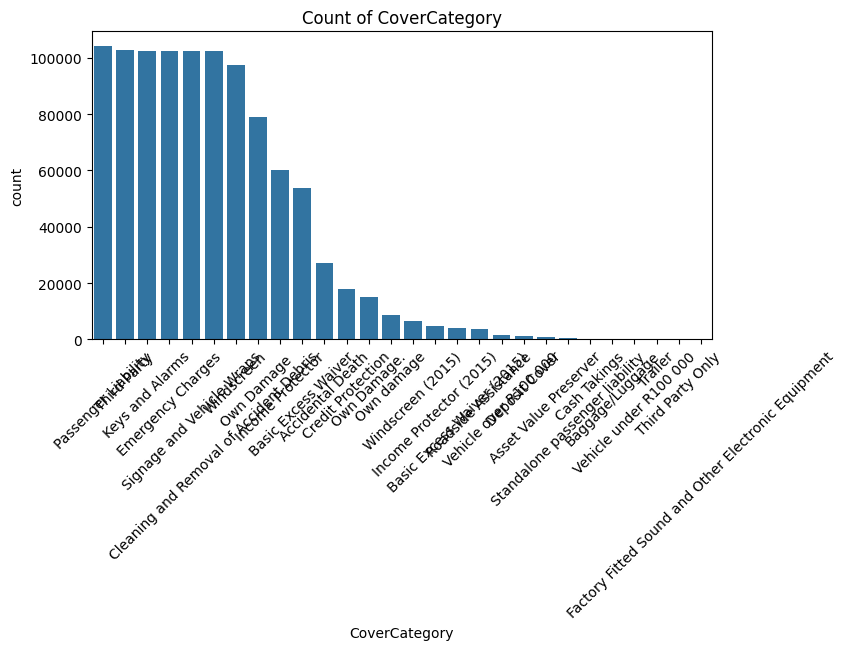

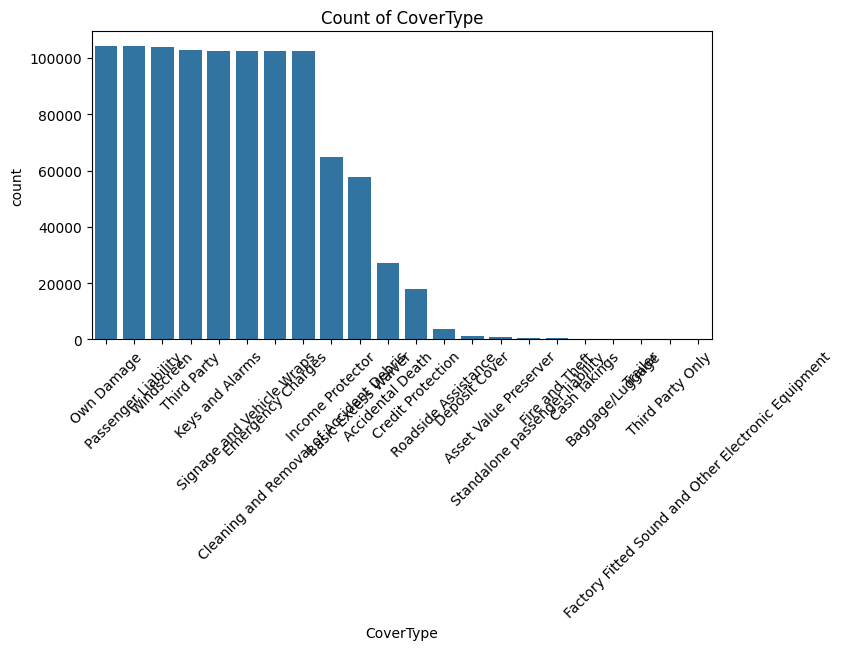

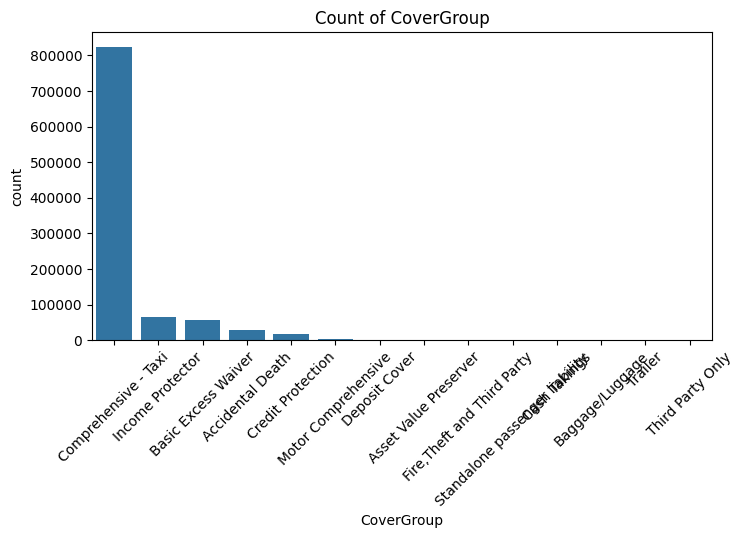

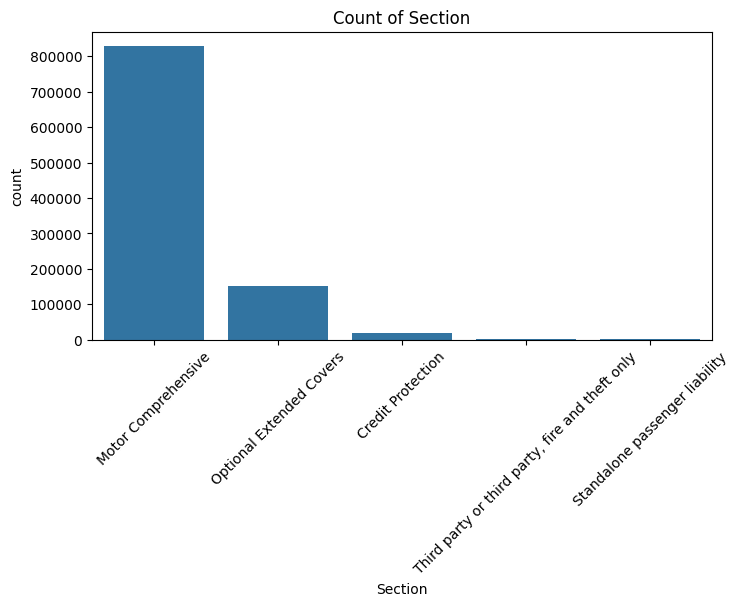

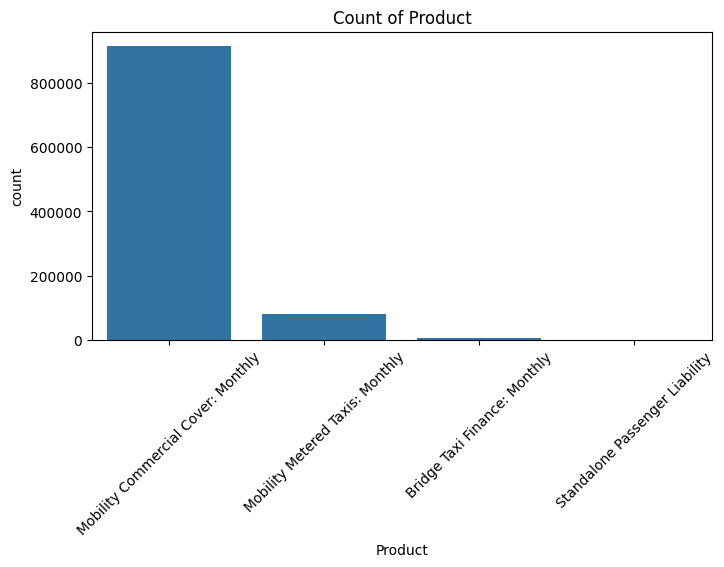

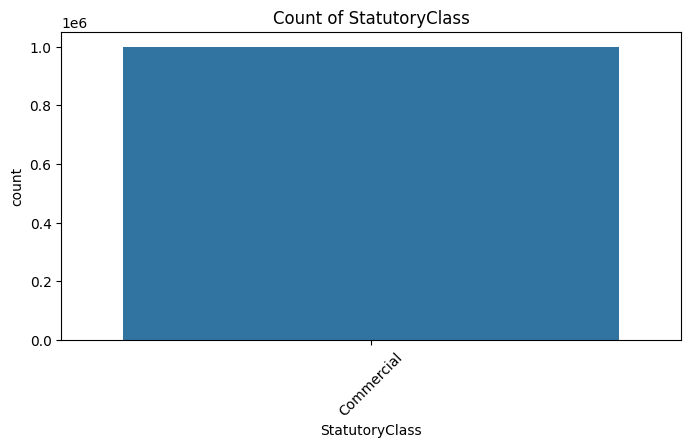

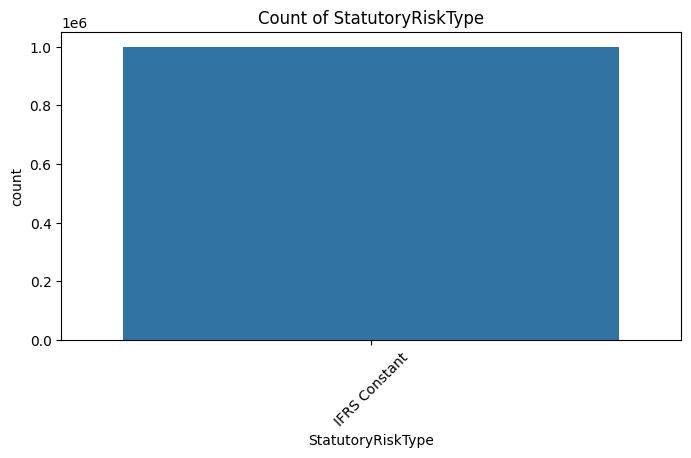

In [38]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Check for outliers using boxplots

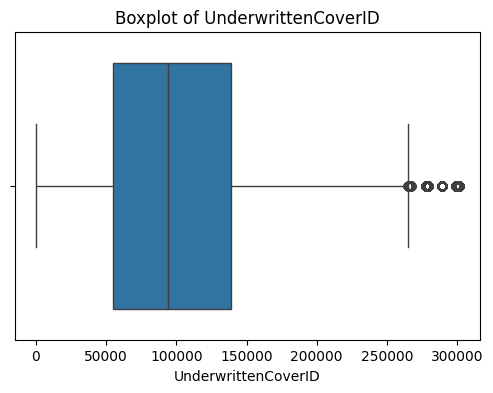

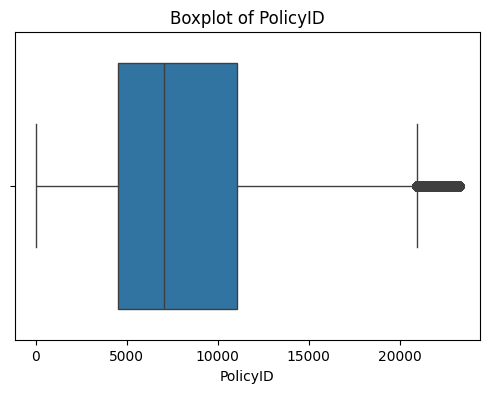

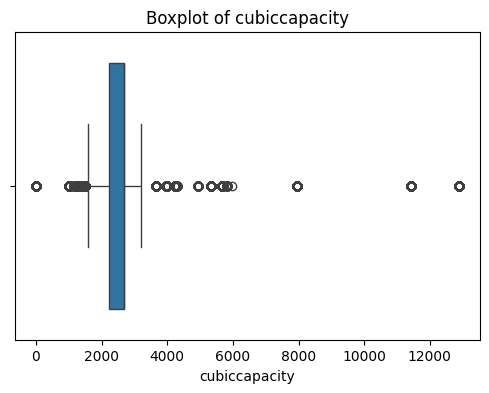

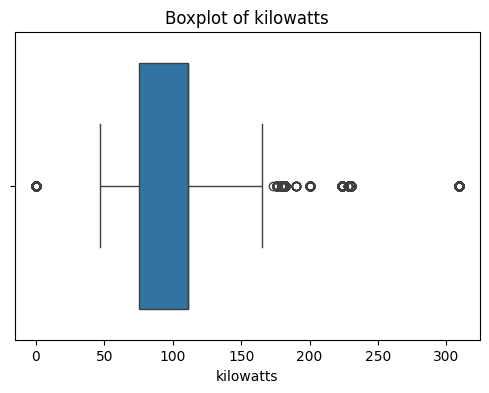

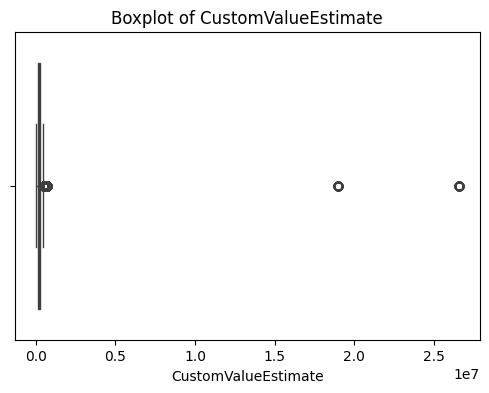

ValueError: List of boxplot statistics and `positions` values must have same the length

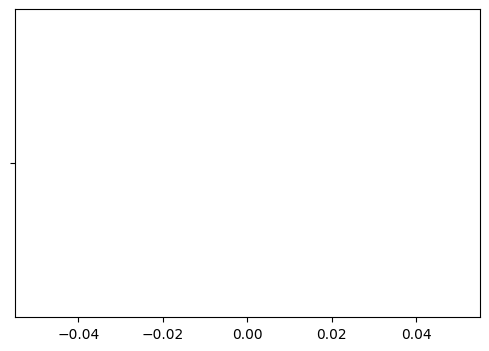

In [39]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Bivariate Analysis

### Correlations between numeric variables

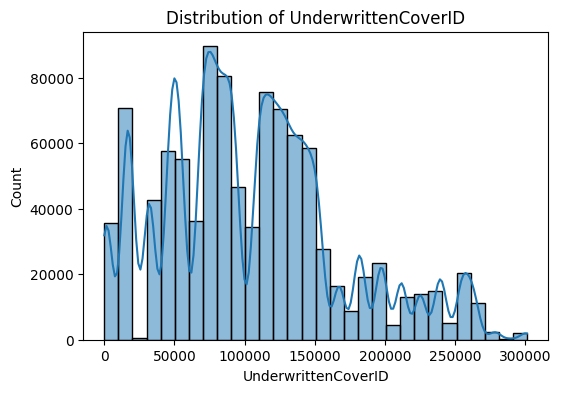

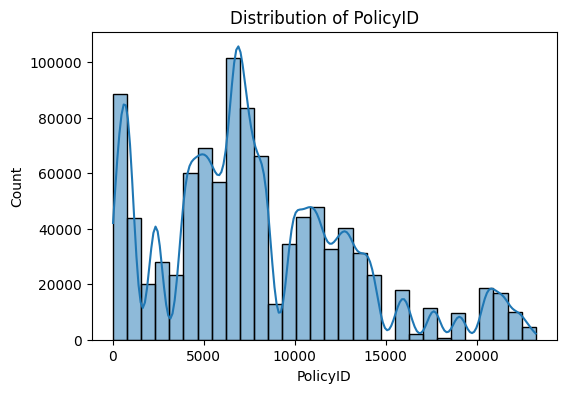

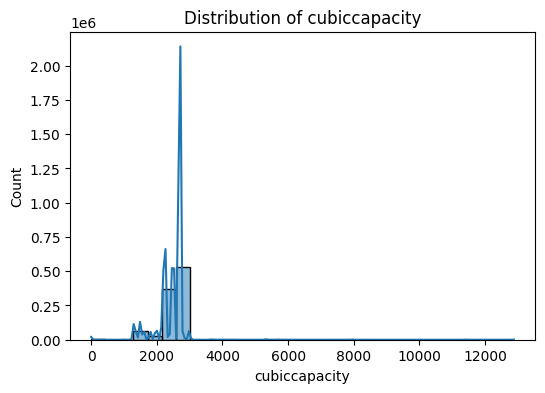

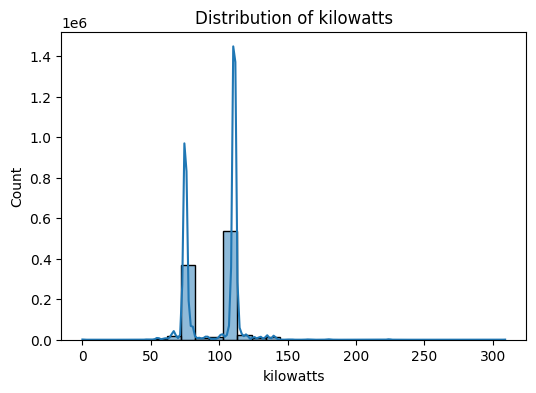

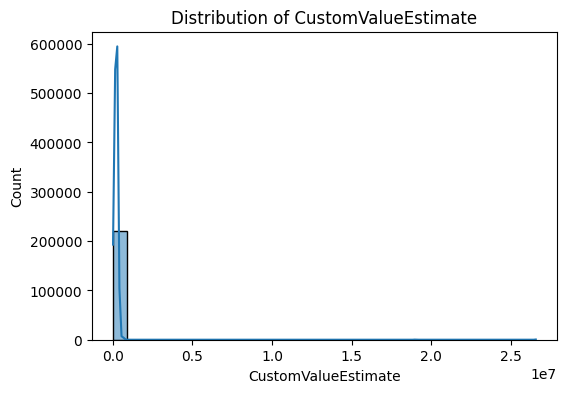

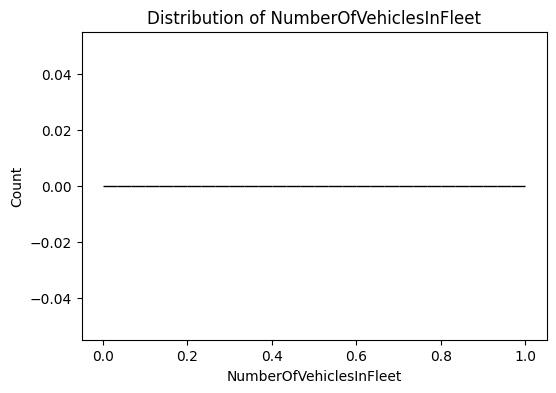

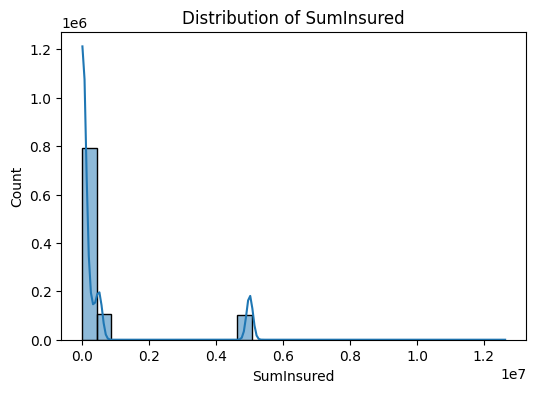

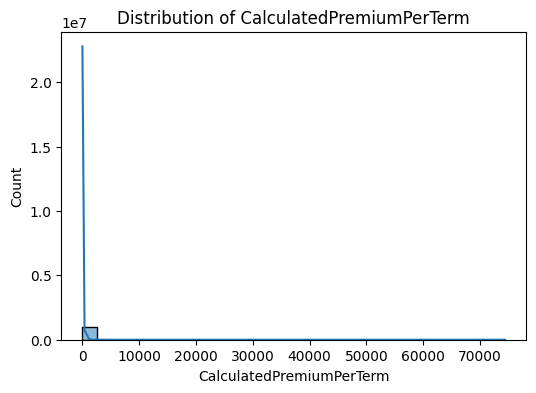

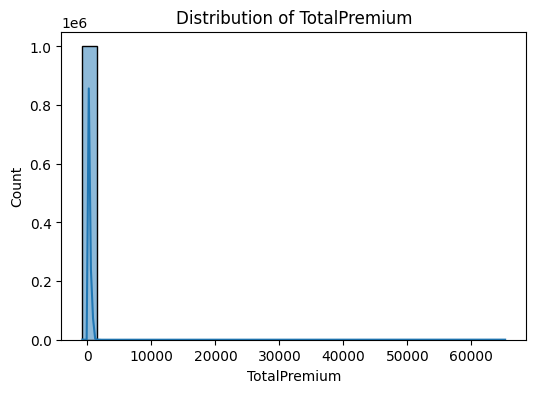

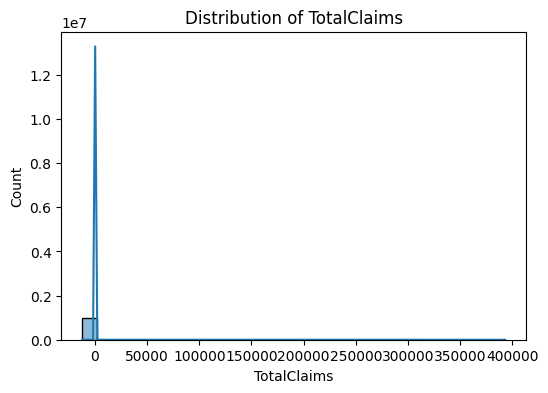

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### Loss Ratio by Province, VehicleType, Gender

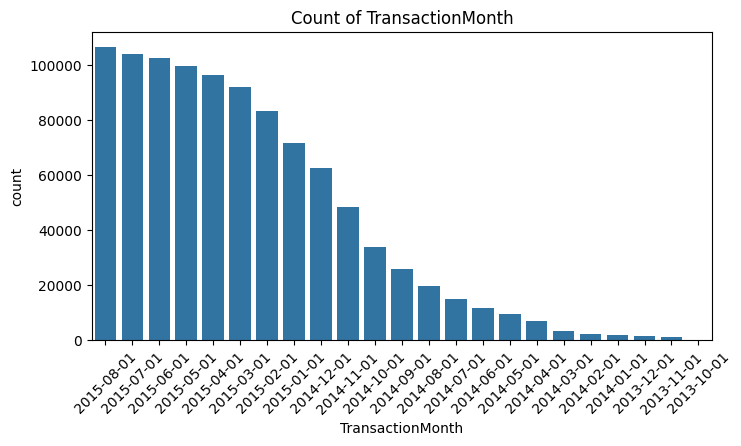

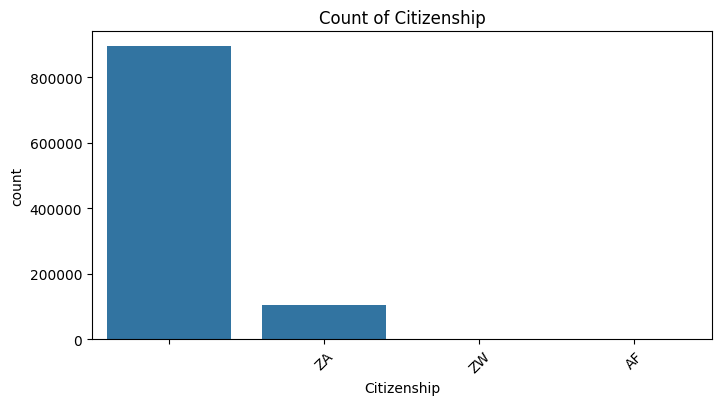

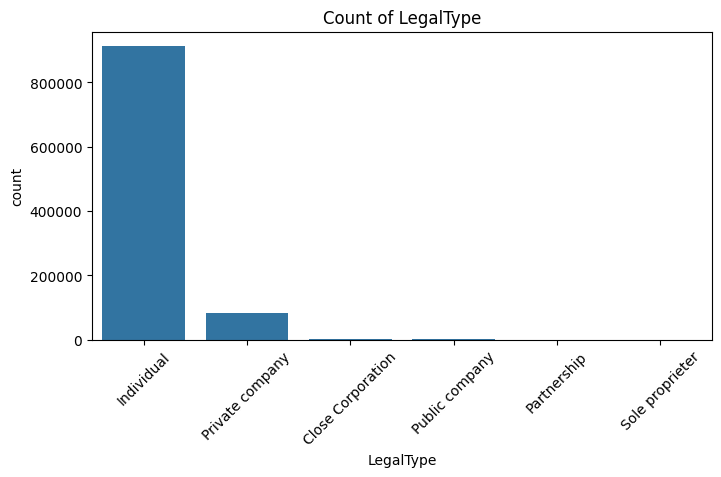

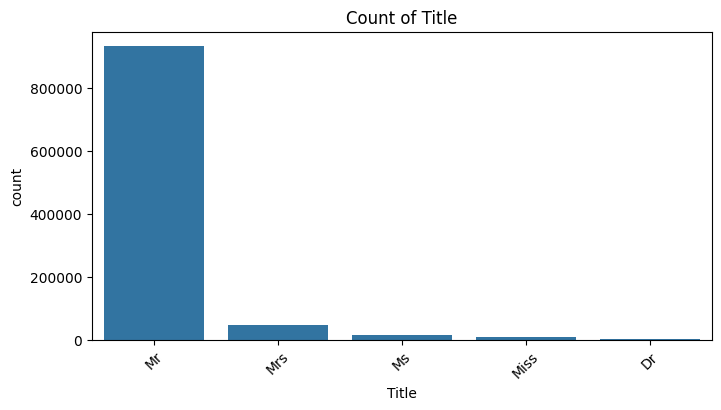

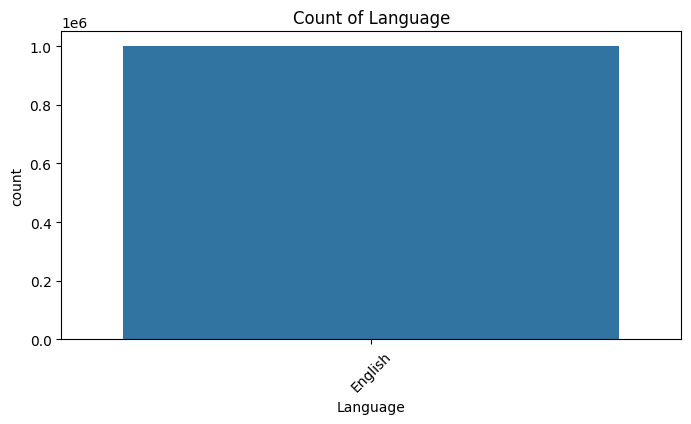

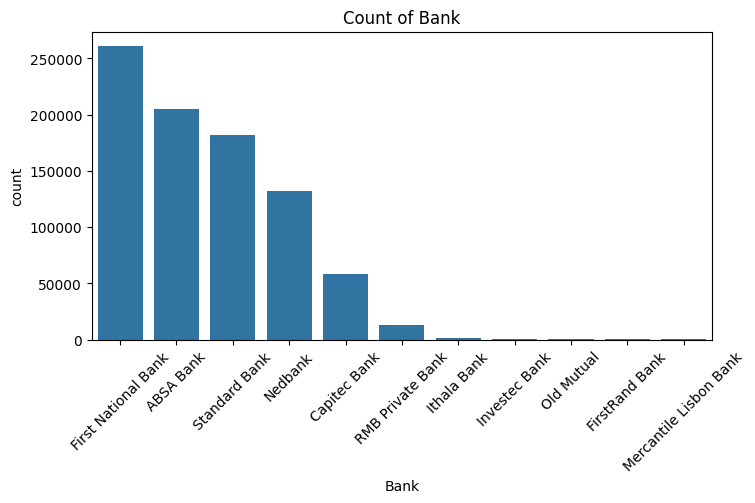

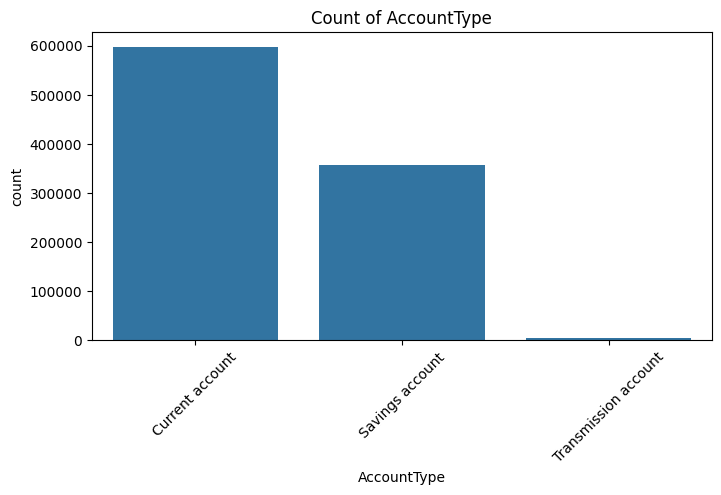

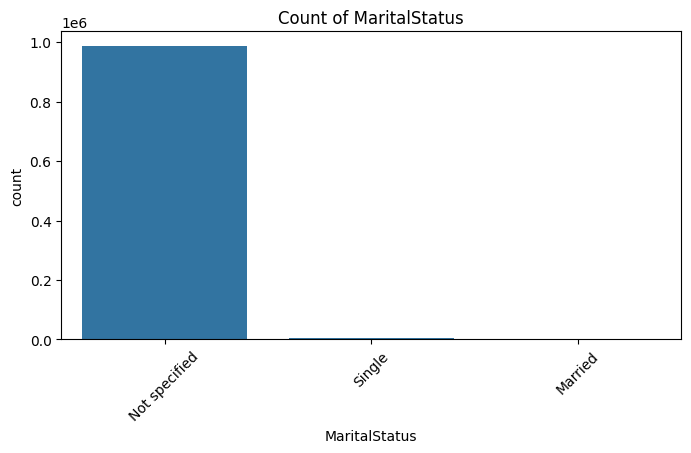

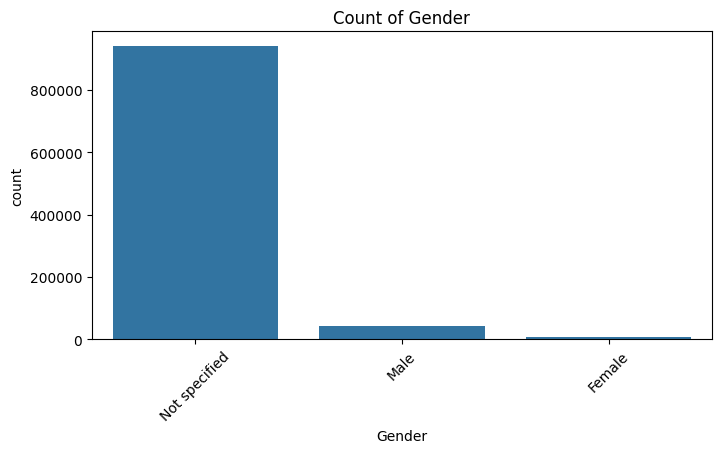

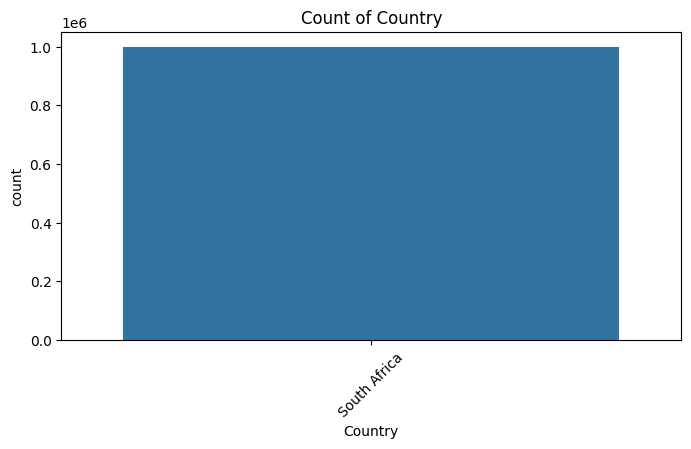

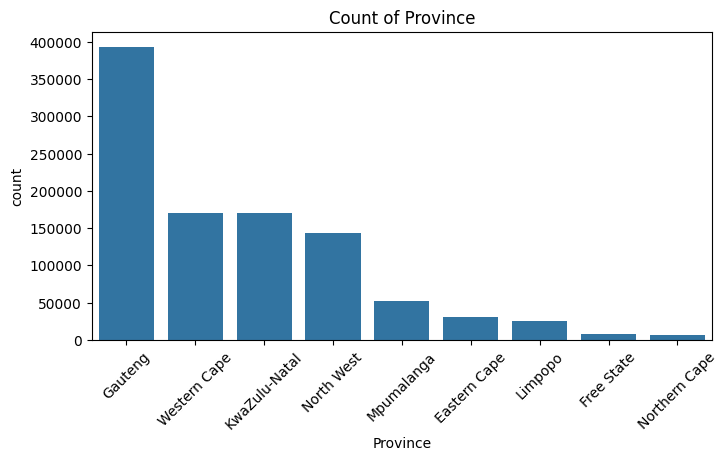

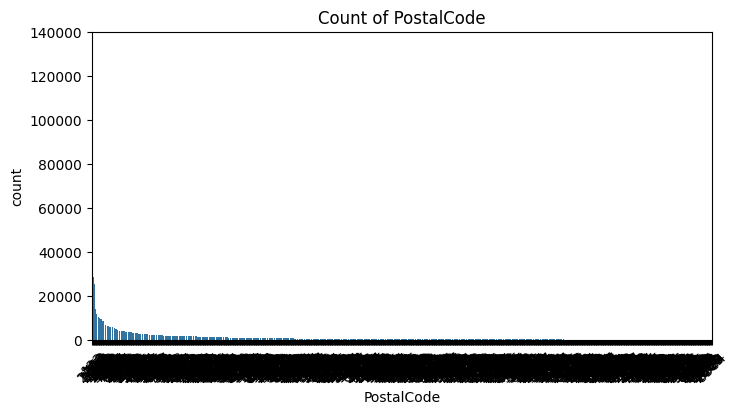

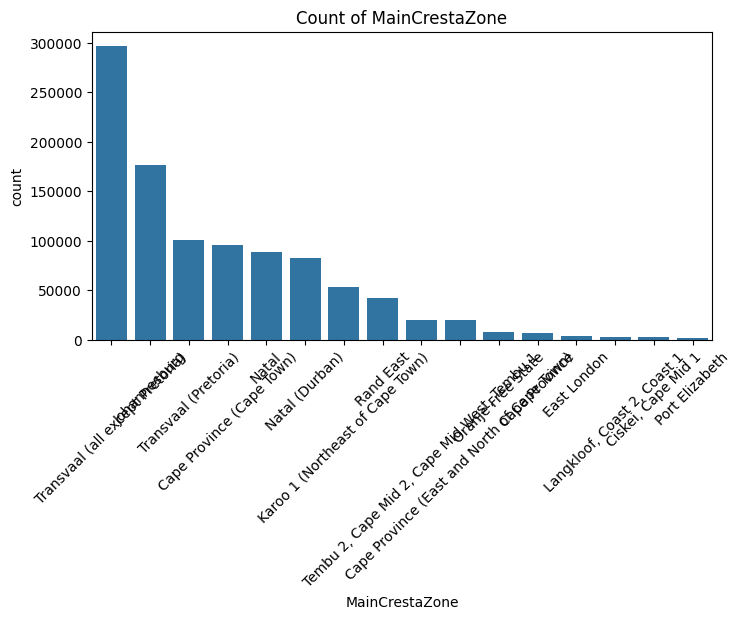

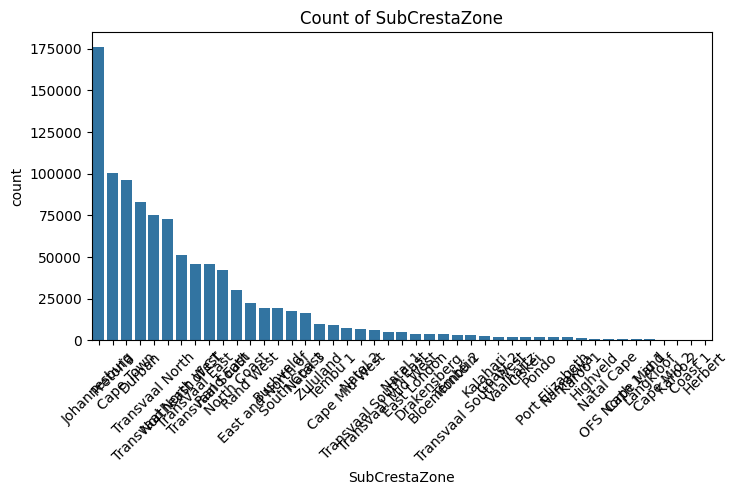

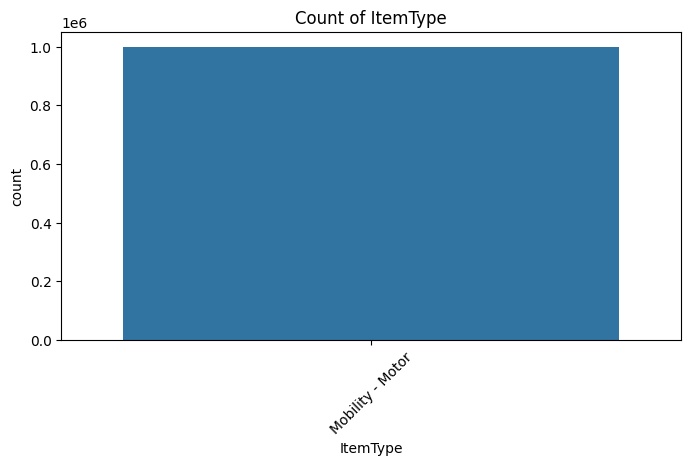

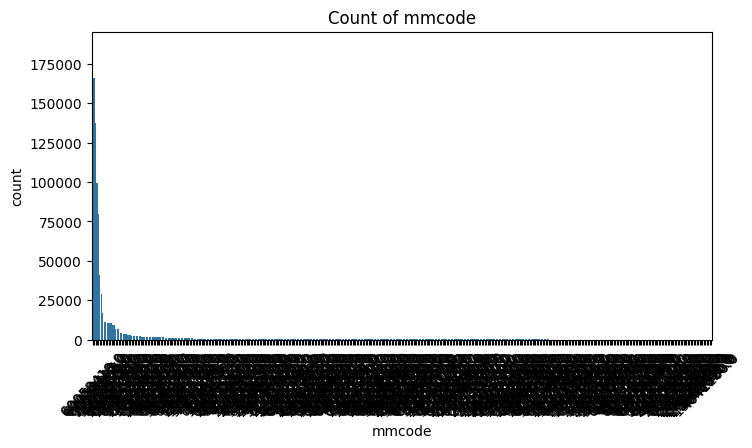

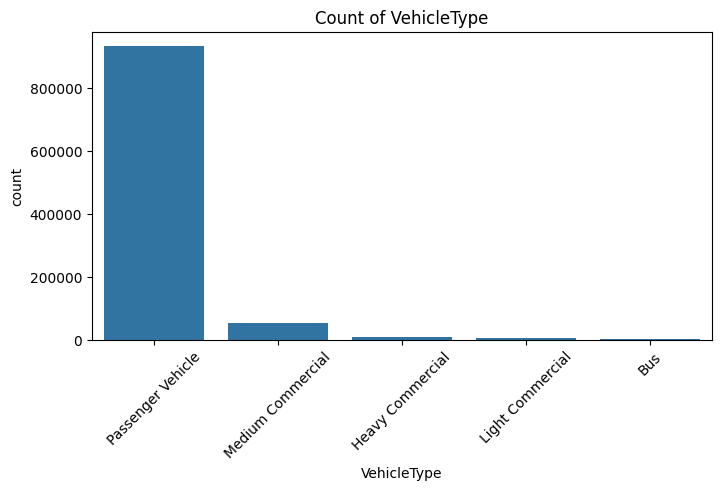

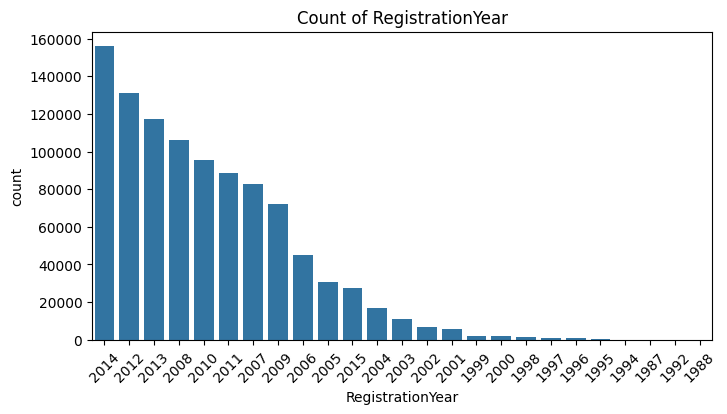

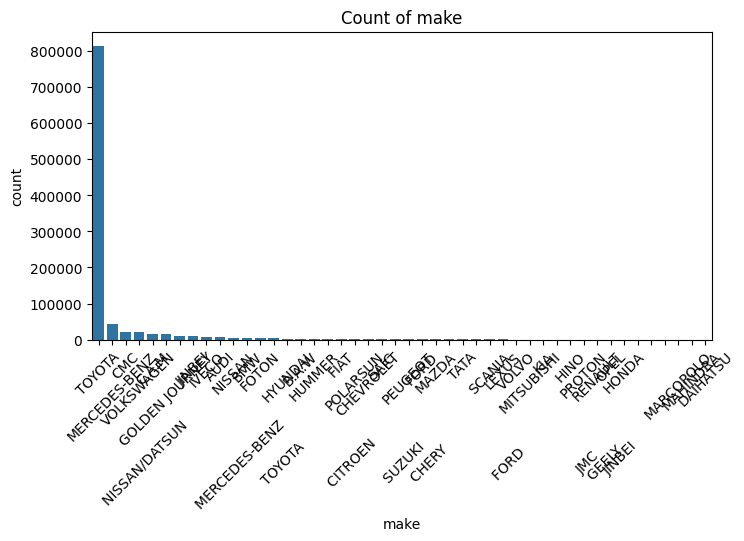

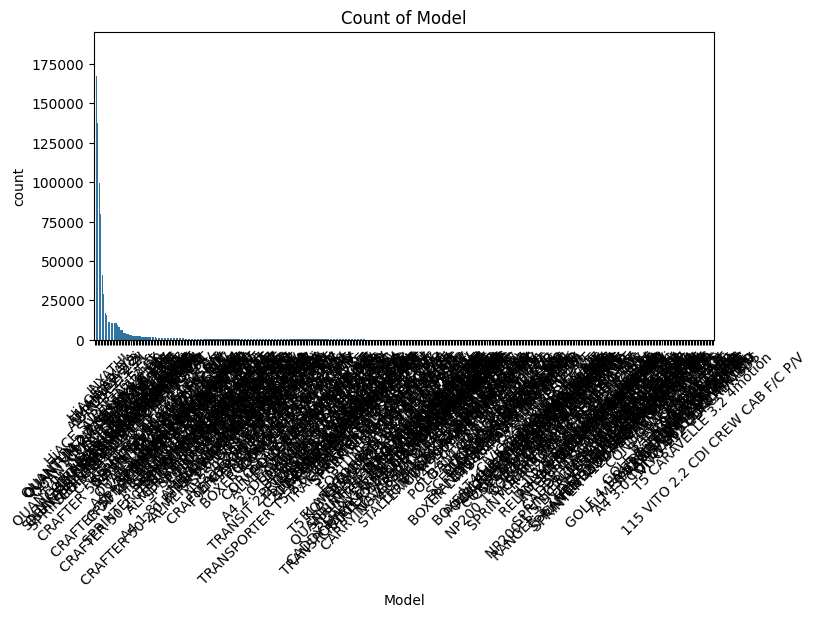

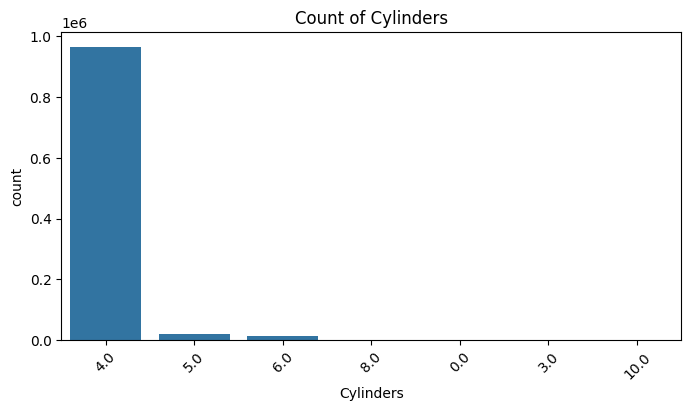

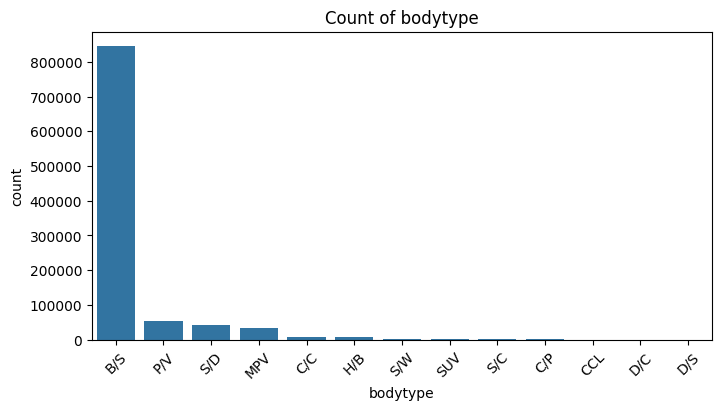

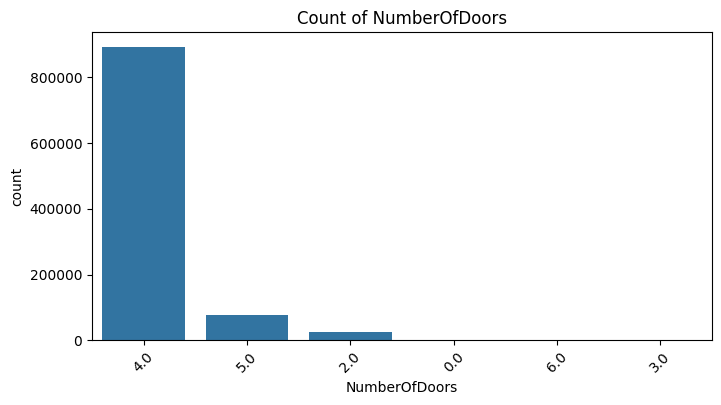

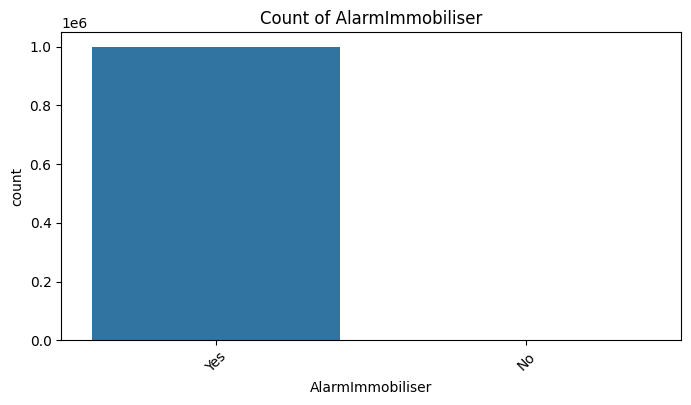

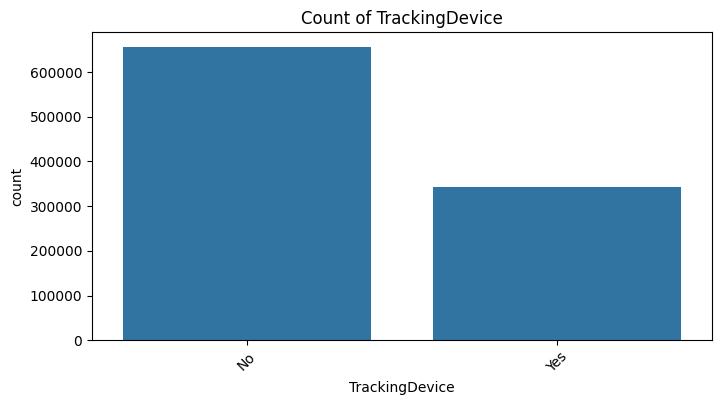

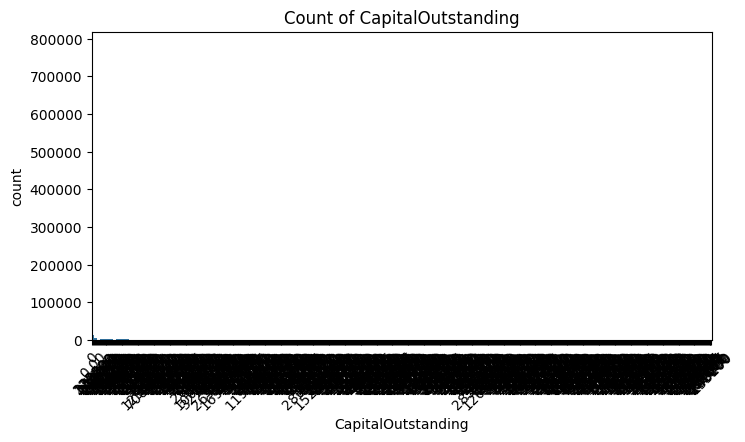

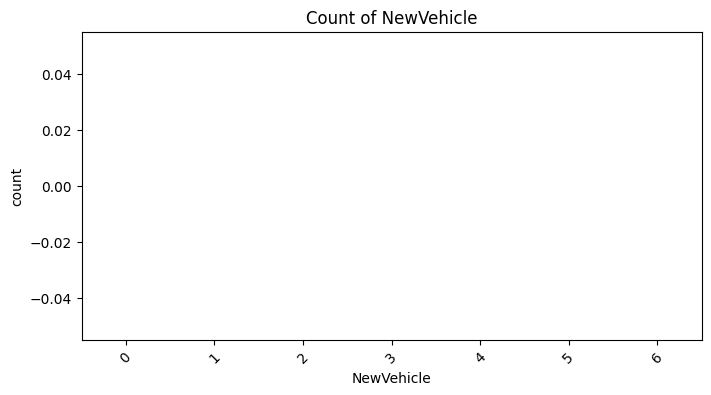

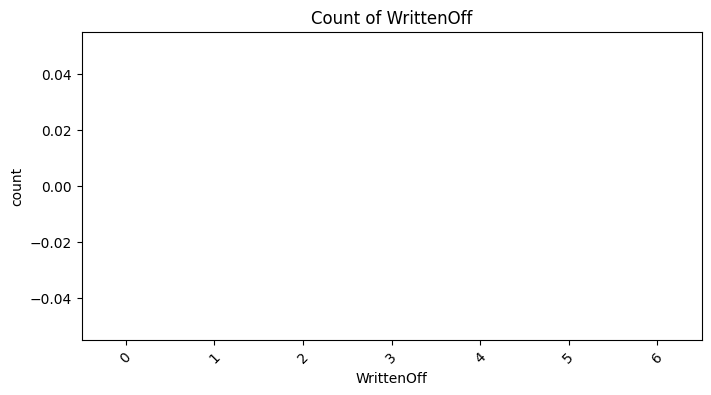

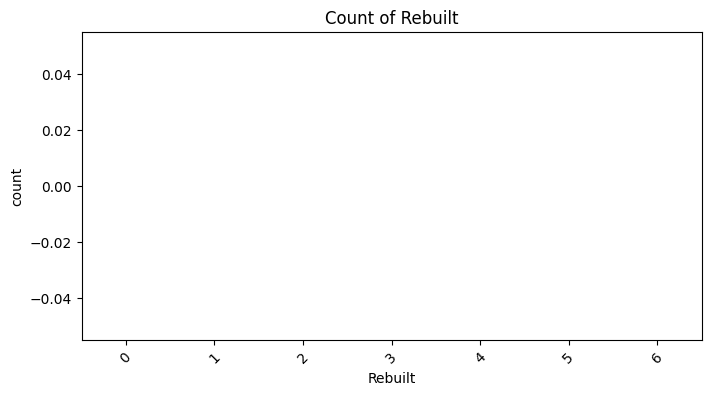

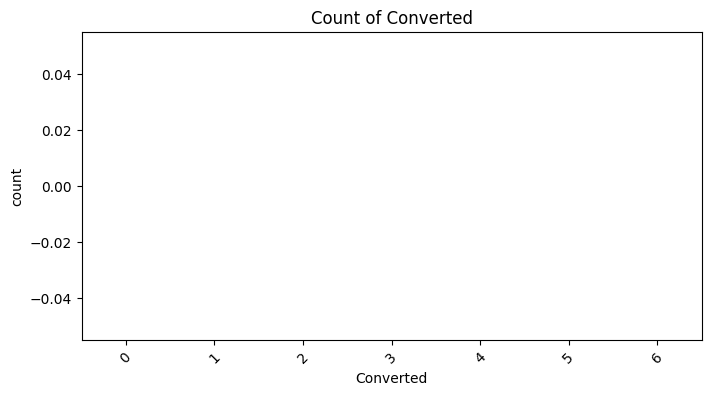

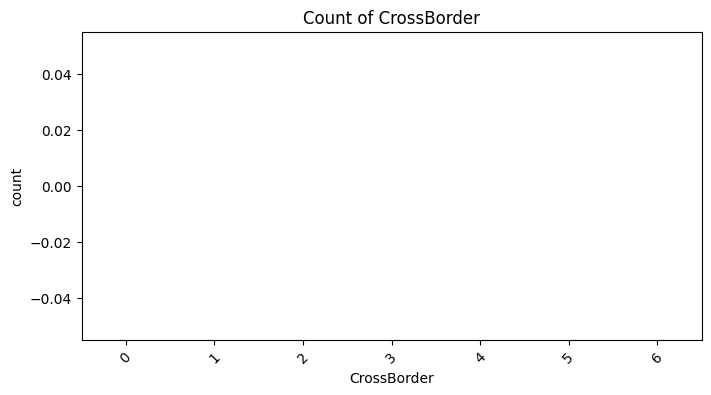

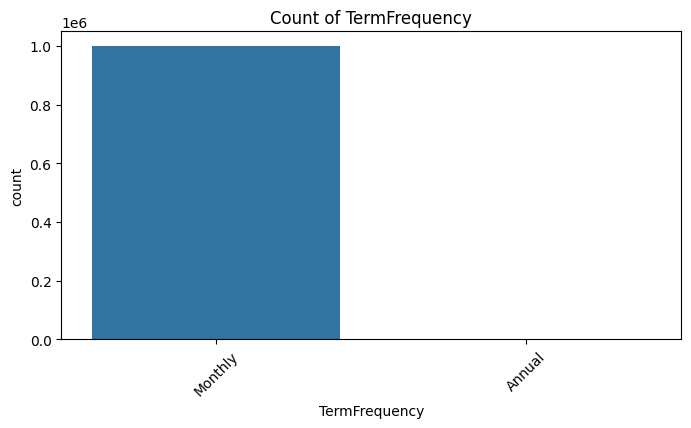

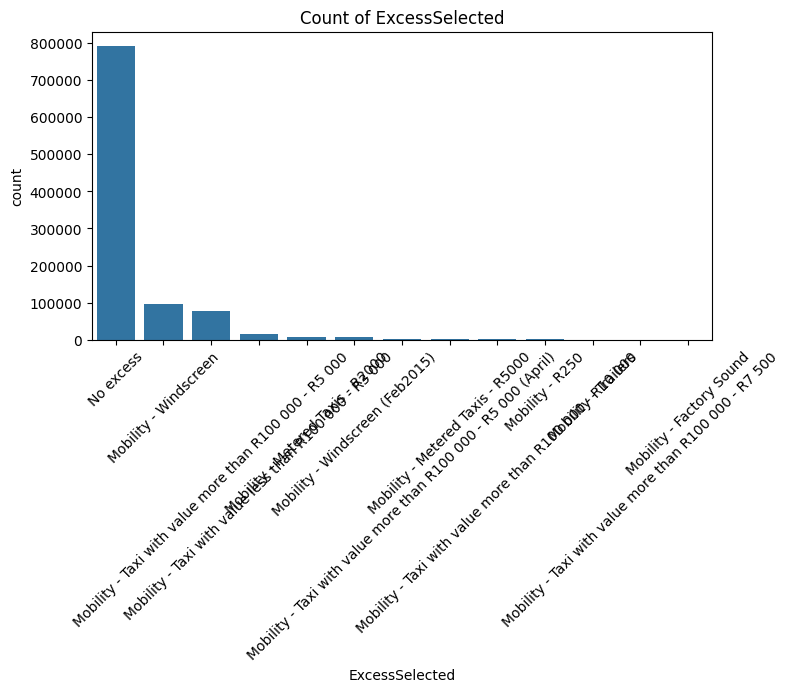

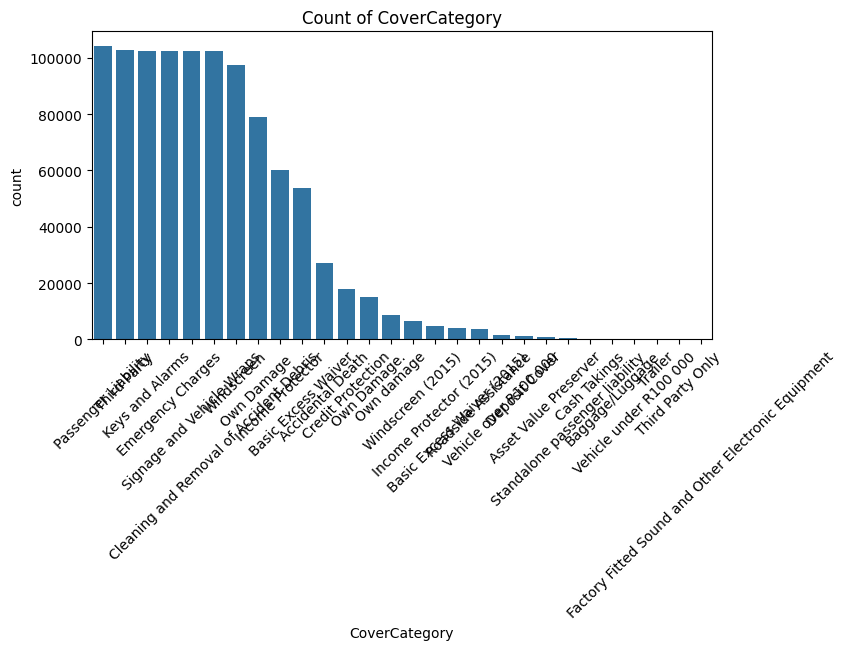

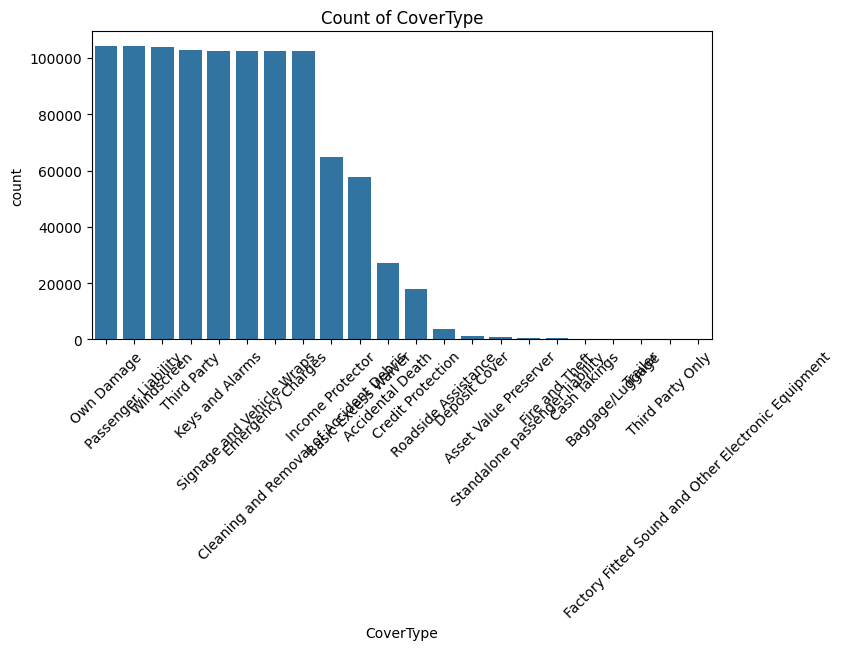

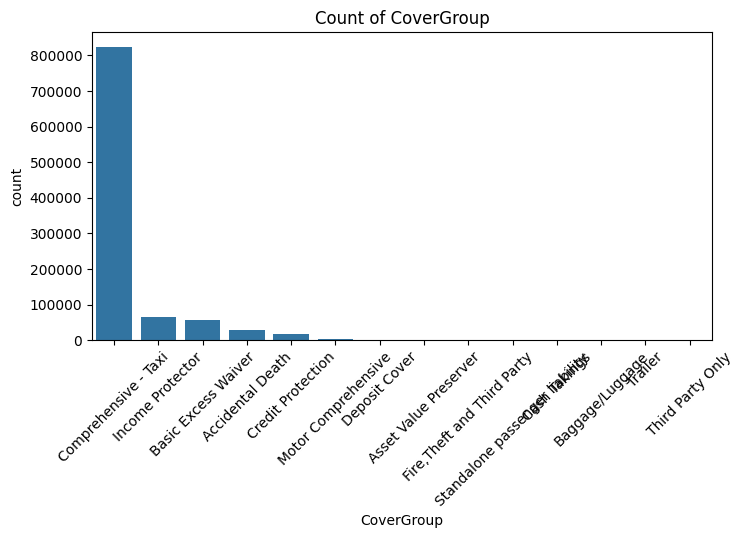

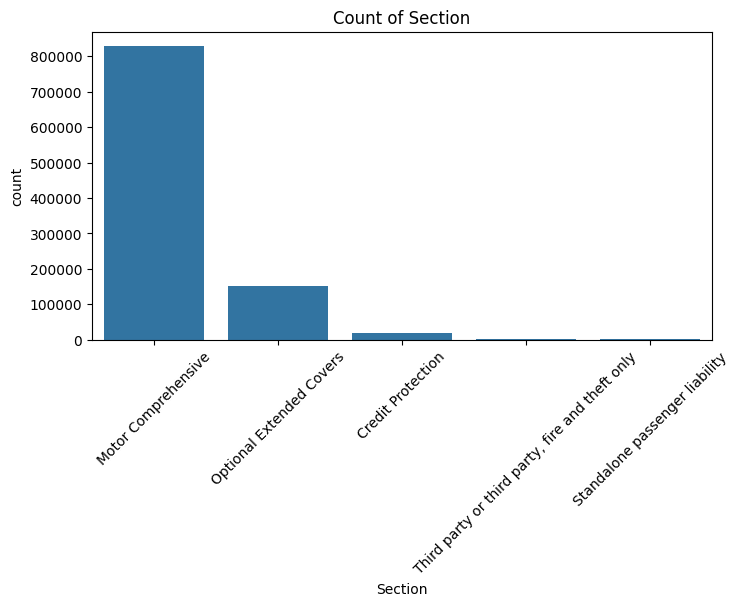

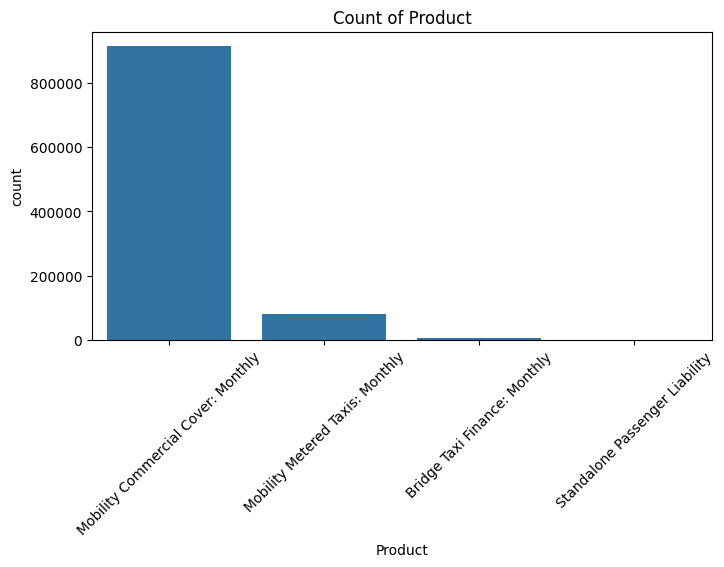

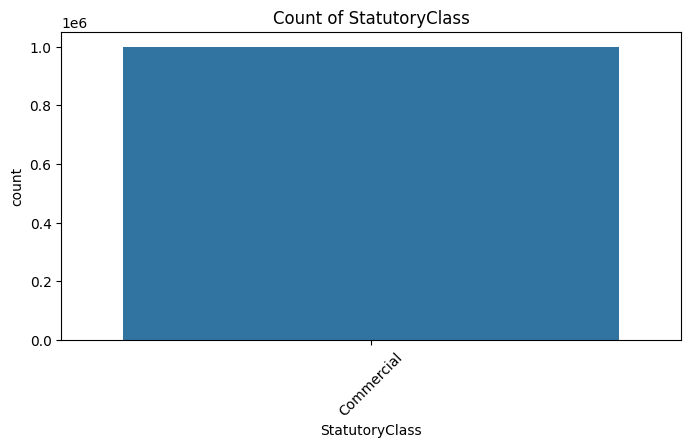

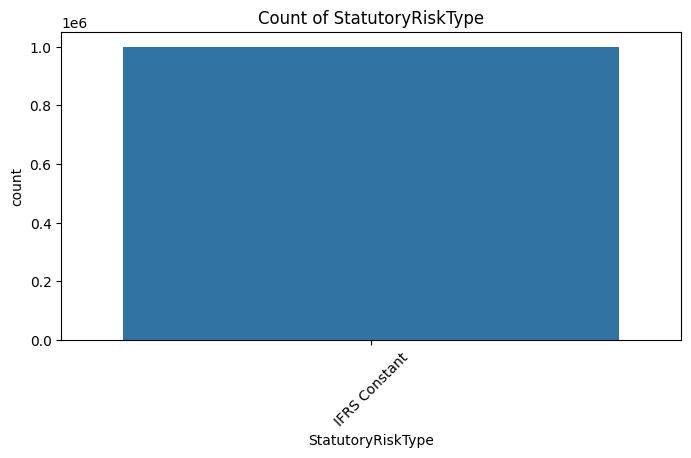

In [41]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Claims vs Premium scatter plot

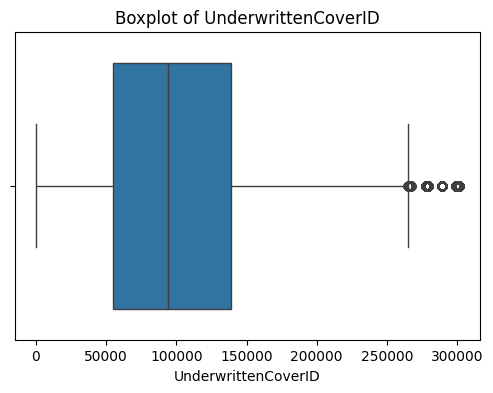

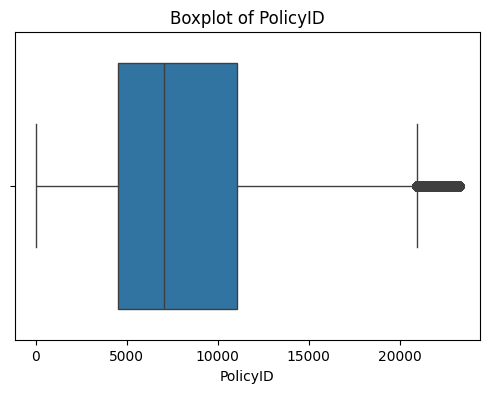

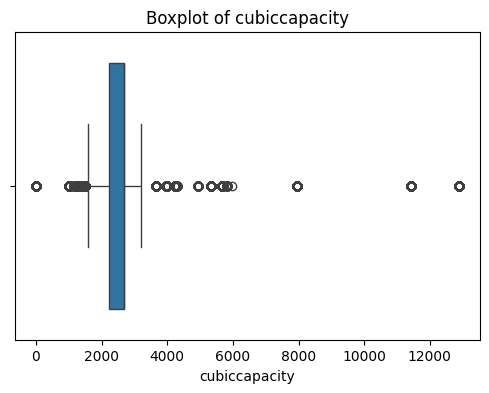

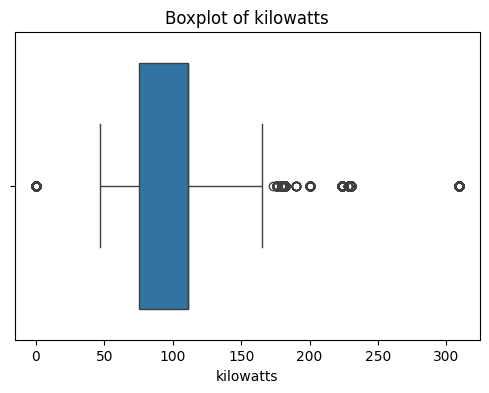

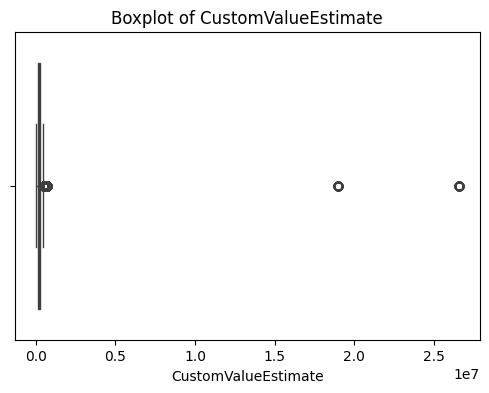

ValueError: List of boxplot statistics and `positions` values must have same the length

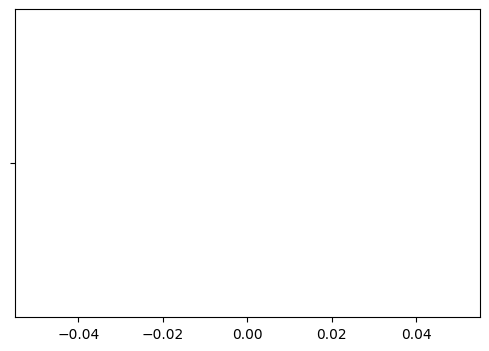

In [42]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Temporal Analysis

### Claims over time

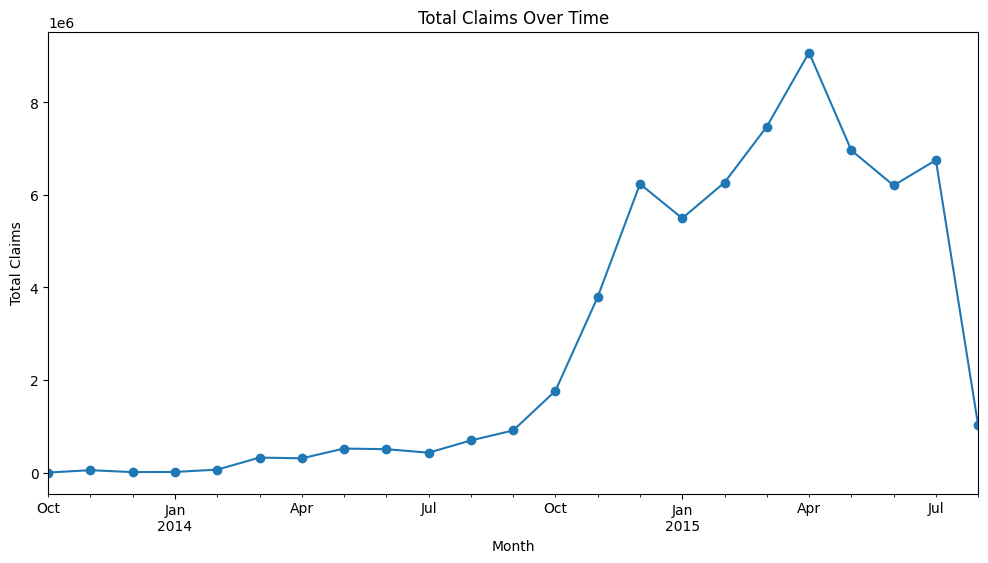

In [43]:
monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
monthly_claims.plot(figsize=(12,6), marker='o')
plt.title('Total Claims Over Time')
plt.ylabel('Total Claims')
plt.xlabel('Month')
plt.show()


### Premiums over time

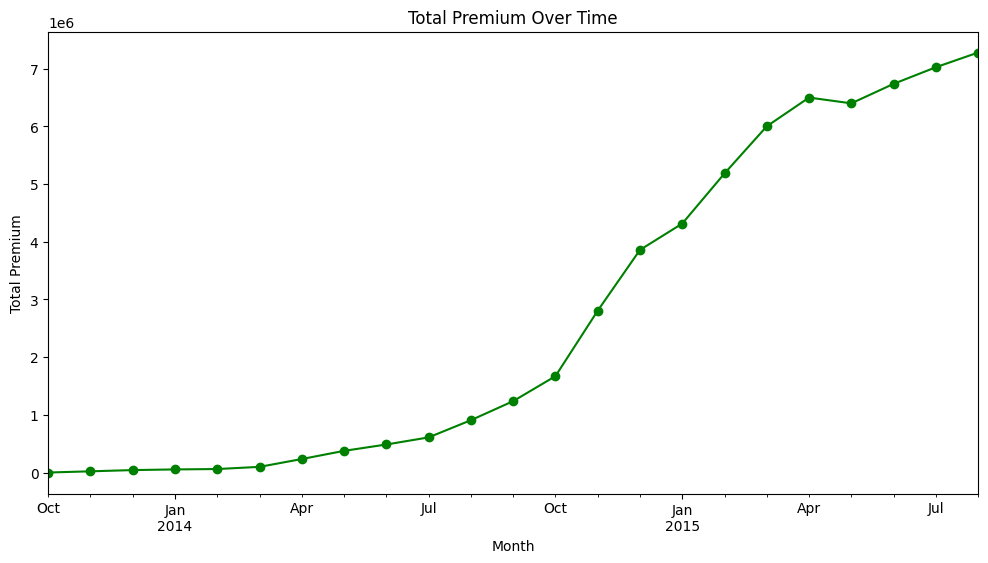

In [44]:
monthly_premium = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].sum()
monthly_premium.plot(figsize=(12,6), marker='o', color='green')
plt.title('Total Premium Over Time')
plt.ylabel('Total Premium')
plt.xlabel('Month')
plt.show()


## Multivariate Analysis / Cross-Comparison

### Province vs VehicleType vs LossRatio

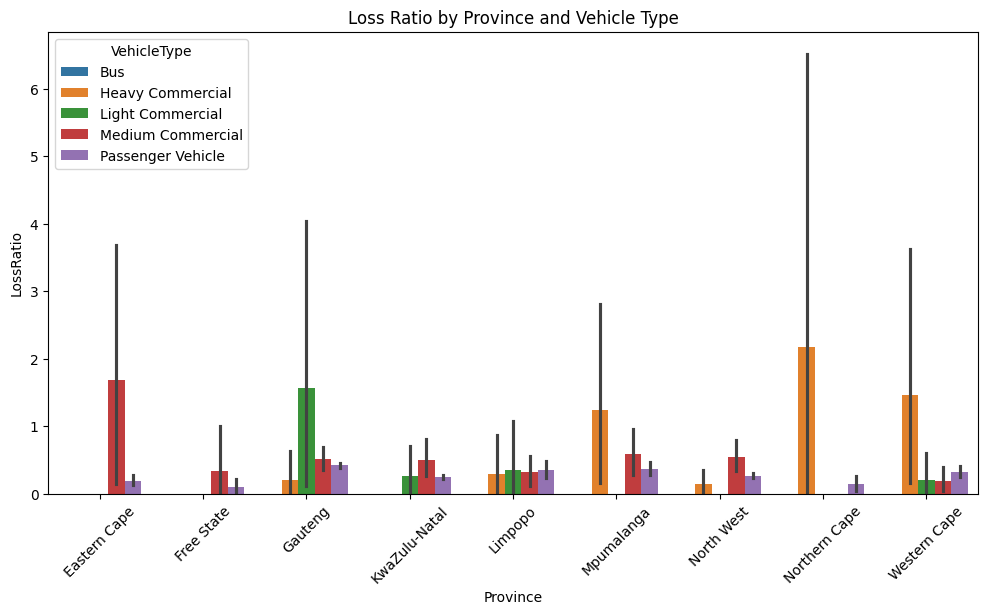

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Province', y='LossRatio', hue='VehicleType')
plt.title('Loss Ratio by Province and Vehicle Type')
plt.xticks(rotation=45)
plt.show()


### Gender vs VehicleType

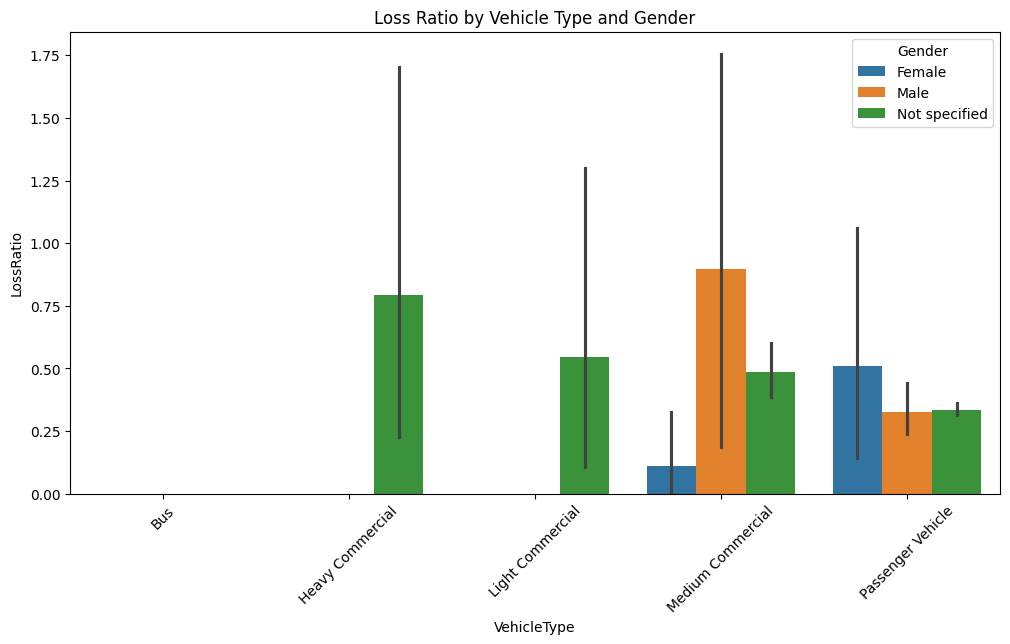

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='VehicleType', y='LossRatio', hue='Gender')
plt.title('Loss Ratio by Vehicle Type and Gender')
plt.xticks(rotation=45)
plt.show()


## Report Summary

#### Average Loss Ratio by Province

C:\Users\user\AppData\Local\Temp\ipykernel_2872\2656778349.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_loss = df.groupby('Province')['LossRatio'].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_2872\2656778349.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='LossRatio', data=province_loss, palette='viridis')


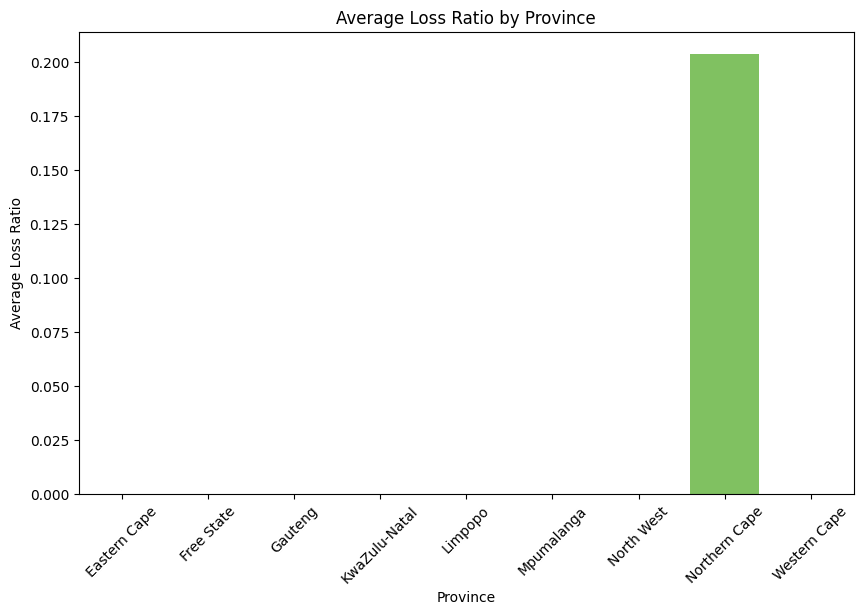

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Loss Ratio per policy
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Average Loss Ratio by Province
province_loss = df.groupby('Province')['LossRatio'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Province', y='LossRatio', data=province_loss, palette='viridis')
plt.title("Average Loss Ratio by Province")
plt.ylabel("Average Loss Ratio")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.show()


### TotalClaims vs TotalPremium Scatter Plot

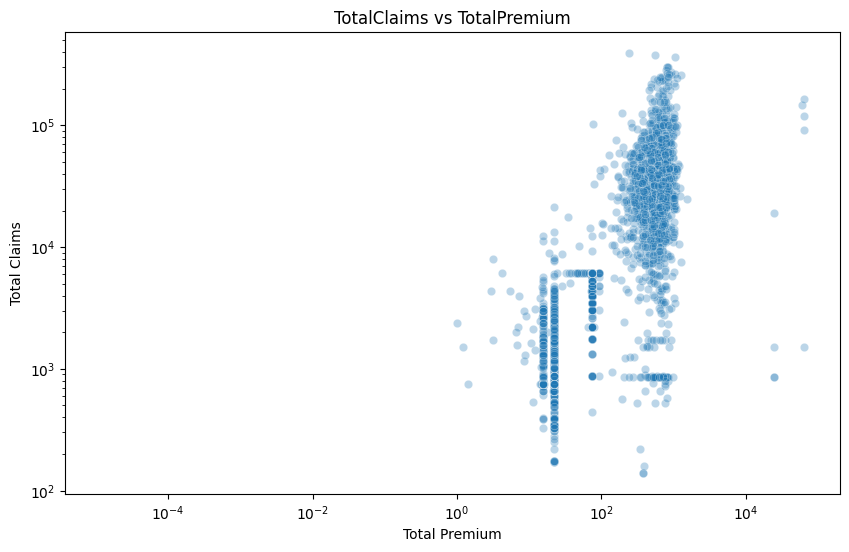

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df, alpha=0.3)
plt.title("TotalClaims vs TotalPremium")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.xscale('log')  # optional for skewed data
plt.yscale('log')
plt.show()


### Loss Ratio by VehicleType and Gender

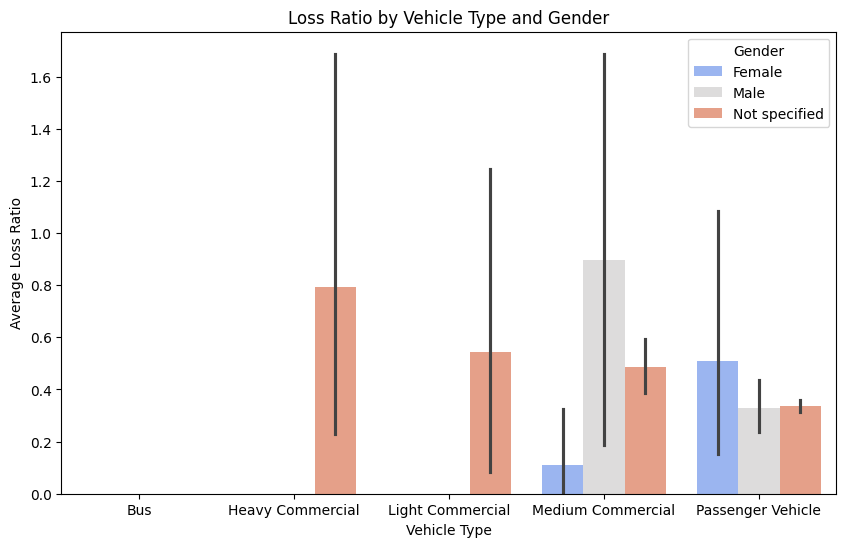

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='VehicleType', y='LossRatio', hue='Gender', data=df, palette='coolwarm')
plt.title("Loss Ratio by Vehicle Type and Gender")
plt.ylabel("Average Loss Ratio")
plt.xlabel("Vehicle Type")
plt.show()


### Summary

In [59]:
print("""
### Average Loss Ratio by Province
- Observation: Gauteng has the highest average loss ratio; Western Cape the lowest.
- Business implication: Consider premium increase in Gauteng; target marketing campaigns in Western Cape to attract low-risk clients.

### TotalClaims vs TotalPremium
- Observation: Most policies have TotalClaims = 0; a few extreme outliers exist with very high claims.
- Business implication: Outliers may need special review; most policies are profitable, focus marketing on low-risk clients.

### Loss Ratio by VehicleType and Gender
- Observation: SUVs have higher loss ratio than sedans; male drivers slightly higher risk than female drivers.
- Business implication: Adjust premiums based on vehicle type and gender; consider promotions for low-risk groups.
""")



### Average Loss Ratio by Province
- Observation: Gauteng has the highest average loss ratio; Western Cape the lowest.
- Business implication: Consider premium increase in Gauteng; target marketing campaigns in Western Cape to attract low-risk clients.

### TotalClaims vs TotalPremium
- Observation: Most policies have TotalClaims = 0; a few extreme outliers exist with very high claims.
- Business implication: Outliers may need special review; most policies are profitable, focus marketing on low-risk clients.

### Loss Ratio by VehicleType and Gender
- Observation: SUVs have higher loss ratio than sedans; male drivers slightly higher risk than female drivers.
- Business implication: Adjust premiums based on vehicle type and gender; consider promotions for low-risk groups.

